In [1]:
from __future__ import division, print_function
# отключим всякие предупреждения Anaconda
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import os
 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#!pip install scikit-plot
import scikitplot as skplt
pd.set_option('display.float_format', '{:.3f}'.format)
import sklearn.metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

#from sklearn.metrics import f1_score,recall_score,precision_score
#from sklearn.metrics import roc_curve, auc
#from sklearn.metrics import roc_auc_score

#!pip install sweetviz
import sweetviz

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
#!pip install catboost
import catboost
from catboost import Pool,CatBoost
from catboost import CatBoostClassifier
from catboost.utils import eval_metric
from catboost.utils import get_fpr_curve
from catboost.utils import get_fnr_curve
from catboost.utils import select_threshold
from catboost.utils import get_roc_curve
from catboost.utils import get_confusion_matrix

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline


In [2]:
for dirname, _, filenames in os.walk('C:/Users/анатолий/Documents/datasets/archive predict diseases'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

C:/Users/анатолий/Documents/datasets/archive predict diseases\Testing.csv
C:/Users/анатолий/Documents/datasets/archive predict diseases\Training.csv


In [3]:
data_train = pd.read_csv('C:/Users/анатолий/Documents/datasets/archive predict diseases/Training.csv')
data_train.shape

(4920, 134)

In [4]:
data_valid = pd.read_csv('C:/Users/анатолий/Documents/datasets/archive predict diseases/Testing.csv')
data_valid.shape

(42, 133)

In [5]:
data_train

itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  \
0           1          1                     1                    0   
1           0          1                     1                    0   
2           1          0                     1                    0   
3           1          1                     0                    0   
4           1          1                     1                    0   
...       ...        ...                   ...                  ...   
4915        0          0                     0                    0   
4916        0          1                     0                    0   
4917        0          0                     0                    0   
4918        0          1                     0                    0   
4919        0          1                     0                    0   

      shivering  chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  \
0             0       0           0             0        0                 0   
1             0       0           0             0        0                 0   
2             0       0           0             0        0                 0   
3             0       0           0             0        0                 0   
4             0       0           0             0        0                 0   
...         ...     ...         ...           ...      ...               ...   
4915          0       0           0             0        0                 0   
4916          0       0           0             0        0                 0   
4917          0       0           0             0        0                 0   
4918          0       0           1             0        0                 0   
4919          0       0           0             0        0                 0   

      ...  scurring  skin_peeling  silver_like_dusting  small_dents_in_nails  \
0     ...         0             0                    0                     0   
1     ...         0             0                    0                     0   
2     ...         0             0                    0                     0   
3     ...         0             0                    0                     0   
4     ...         0             0                    0                     0   
...   ...       ...           ...                  ...                   ...   
4915  ...         0             0                    0                     0   
4916  ...         1             0                    0                     0   
4917  ...         0             0                    0                     0   
4918  ...         0             1                    1                     1   
4919  ...         0             0                    0                     0   

      inflammatory_nails  blister  red_sore_around_nose  yellow_crust_ooze  \
0                      0        0                     0                  0   
1                      0        0                     0                  0   
2                      0        0                     0                  0   
3                      0        0                     0                  0   
4                      0        0                     0                  0   
...                  ...      ...                   ...                ...   
4915                   0        0                     0                  0   
4916                   0        0                     0                  0   
4917                   0        0                     0                  0   
4918                   1        0                     0                  0   
4919                   0        1                     1                  1   

                                    prognosis  Unnamed: 133  
0                            Fungal infection           NaN  
1                            Fungal infection           NaN  
2                            Fungal infection           NaN  
3                            Fungal infection 

In [6]:
data_valid

itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  shivering  \
0         1          1                     1                    0          0   
1         0          0                     0                    1          1   
2         0          0                     0                    0          0   
3         1          0                     0                    0          0   
4         1          1                     0                    0          0   
5         0          0                     0                    0          0   
6         0          0                     0                    0          0   
7         0          0                     0                    0          0   
8         0          0                     0                    0          0   
9         0          0                     0                    0          0   
10        0          0                     0                    0          0   
11        0          0                     0                    0          0   
12        0          0                     0                    0          0   
13        0          0                     0                    0          0   
14        1          0                     0                    0          0   
15        0          0                     0                    0          0   
16        1          1                     0                    0          0   
17        0          1                     0                    0          0   
18        0          0                     0                    0          0   
19        0          0                     0                    0          0   
20        1          0                     0                    0          0   
21        0          0                     0                    0          0   
22        0          0                     0                    0          0   
23        0          0                     0                    0          0   
24        0          0                     0                    0          0   
25        0          0                     0                    0          0   
26        0          0                     0                    1          0   
27        0          0                     0                    0          0   
28        0          0                     0                    0          0   
29        0          0                     0                    0          0   
30        0          0                     0                    0          0   
31        0          0                     0                    0          0   
32        0          0                     0                    0          0   
33        0          0                     0                    0          0   
34        0          0                     0                    0          0   
35        0          0                     0                    0          0   
36        0          0                     0                    0          0   
37        0          1                     0                    0          0   
38        0          0                     0                    0          0   
39        0          1                     0                    0          0   
40        0          1                     0                    0          0   
41        1          1                     0                    0          0   

    chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  ...  \
0        0           0             0        0                 0  ...   
1        1           0             0        0                 0  ...   
2        0           0             1        1                 1  ...   
3        0           0             0        0                 0  ...   
4        0           0             1        0                 0  ...   
5        0           0             0        0                 0  ...   
6        0           0             0        0              

In [7]:
data_train.drop(columns='Unnamed: 133', inplace=True)

In [8]:
data_train.info(verbose=True,null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Data columns (total 133 columns):
 #    Column                          Non-Null Count  Dtype 
---   ------                          --------------  ----- 
 0    itching                         4920 non-null   int64 
 1    skin_rash                       4920 non-null   int64 
 2    nodal_skin_eruptions            4920 non-null   int64 
 3    continuous_sneezing             4920 non-null   int64 
 4    shivering                       4920 non-null   int64 
 5    chills                          4920 non-null   int64 
 6    joint_pain                      4920 non-null   int64 
 7    stomach_pain                    4920 non-null   int64 
 8    acidity                         4920 non-null   int64 
 9    ulcers_on_tongue                4920 non-null   int64 
 10   muscle_wasting                  4920 non-null   int64 
 11   vomiting                        4920 non-null   int64 
 12   burning_micturition             

In [9]:
data_train.isnull().sum()

itching                 0
skin_rash               0
nodal_skin_eruptions    0
continuous_sneezing     0
shivering               0
                       ..
inflammatory_nails      0
blister                 0
red_sore_around_nose    0
yellow_crust_ooze       0
prognosis               0
Length: 133, dtype: int64

In [10]:
data_valid.info(verbose=True,null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 133 columns):
 #    Column                          Non-Null Count  Dtype 
---   ------                          --------------  ----- 
 0    itching                         42 non-null     int64 
 1    skin_rash                       42 non-null     int64 
 2    nodal_skin_eruptions            42 non-null     int64 
 3    continuous_sneezing             42 non-null     int64 
 4    shivering                       42 non-null     int64 
 5    chills                          42 non-null     int64 
 6    joint_pain                      42 non-null     int64 
 7    stomach_pain                    42 non-null     int64 
 8    acidity                         42 non-null     int64 
 9    ulcers_on_tongue                42 non-null     int64 
 10   muscle_wasting                  42 non-null     int64 
 11   vomiting                        42 non-null     int64 
 12   burning_micturition             42 n

In [11]:
data_train['prognosis'].value_counts(),data_valid['prognosis'].value_counts()

(Hepatitis D                                120
 Peptic ulcer diseae                        120
 Hyperthyroidism                            120
 Psoriasis                                  120
 Common Cold                                120
 Acne                                       120
 Paralysis (brain hemorrhage)               120
 Bronchial Asthma                           120
 Gastroenteritis                            120
 Chicken pox                                120
 Urinary tract infection                    120
 Migraine                                   120
 Cervical spondylosis                       120
 hepatitis A                                120
 Diabetes                                   120
 Hypothyroidism                             120
 Hypertension                               120
 Impetigo                                   120
 Chronic cholestasis                        120
 Malaria                                    120
 Varicose veins                         

In [12]:
data_train.duplicated().sum(),data_valid.duplicated().sum()

(4616, 0)

In [13]:
data_train=data_train.drop_duplicates().reset_index(drop=True)
data_train.duplicated().sum()

0

In [14]:
data_train["prognosis"].values.flatten()

array(['Fungal infection', 'Fungal infection', 'Fungal infection',
       'Fungal infection', 'Fungal infection', 'Allergy', 'Allergy',
       'Allergy', 'Allergy', 'Allergy', 'GERD', 'GERD', 'GERD', 'GERD',
       'GERD', 'GERD', 'GERD', 'Chronic cholestasis',
       'Chronic cholestasis', 'Chronic cholestasis',
       'Chronic cholestasis', 'Chronic cholestasis',
       'Chronic cholestasis', 'Chronic cholestasis',
       'Chronic cholestasis', 'Drug Reaction', 'Drug Reaction',
       'Drug Reaction', 'Drug Reaction', 'Drug Reaction', 'Drug Reaction',
       'Peptic ulcer diseae', 'Peptic ulcer diseae',
       'Peptic ulcer diseae', 'Peptic ulcer diseae',
       'Peptic ulcer diseae', 'Peptic ulcer diseae',
       'Peptic ulcer diseae', 'AIDS', 'AIDS', 'AIDS', 'AIDS', 'AIDS',
       'Diabetes ', 'Diabetes ', 'Diabetes ', 'Diabetes ', 'Diabetes ',
       'Diabetes ', 'Diabetes ', 'Diabetes ', 'Diabetes ',
       'Gastroenteritis', 'Gastroenteritis', 'Gastroenteritis',
       'Gastroen

In [15]:
data_valid["prognosis"].values.flatten()

array(['Fungal infection', 'Allergy', 'GERD', 'Chronic cholestasis',
       'Drug Reaction', 'Peptic ulcer diseae', 'AIDS', 'Diabetes ',
       'Gastroenteritis', 'Bronchial Asthma', 'Hypertension ', 'Migraine',
       'Cervical spondylosis', 'Paralysis (brain hemorrhage)', 'Jaundice',
       'Malaria', 'Chicken pox', 'Dengue', 'Typhoid', 'hepatitis A',
       'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E',
       'Alcoholic hepatitis', 'Tuberculosis', 'Common Cold', 'Pneumonia',
       'Dimorphic hemmorhoids(piles)', 'Heart attack', 'Varicose veins',
       'Hypothyroidism', 'Hyperthyroidism', 'Hypoglycemia',
       'Osteoarthristis', 'Arthritis',
       '(vertigo) Paroymsal  Positional Vertigo', 'Acne',
       'Urinary tract infection', 'Psoriasis', 'Impetigo',
       'Fungal infection'], dtype=object)

In [16]:
data_prog = preprocessing.LabelEncoder()
data_train['prognosis'] = data_prog.fit_transform(data_train['prognosis'])
data_train['prognosis'].dtypes

dtype('int32')

In [17]:
data_valid['prognosis'] = preprocessing.LabelEncoder().fit_transform(data_valid['prognosis'])
data_valid['prognosis'].dtypes

dtype('int32')

*Когда мы нажмем на кнопку «Ассоциации» в разделе сводки, в правой части экрана появится тепловая карта корреляции. Тепловая карта содержит квадраты или круги, присутствующие на каждой плитке. Круги представляют корреляцию Пирсона в диапазоне [-1, 1]. Квадраты представляют собой категориальные ассоциации. Категориальные ассоциации идут по строкам и показывают, сколько ассоциаций имеет объект, представленный именем строки слева, со всеми другими признаками данных. Категориальные ассоциации варьируются от [0,1]. Тепловая карта будет иметь круг всякий раз, когда показывает отношение между числовыми признаками и квадратами при отображении отношения между категориальными признаками или числовыми и категориальными признаками. Диагональ диаграммы остается пустой, так как каждый объект имеет полную связь с самим собой. В нашем примере функция WineType категорична, поэтому строка и столбец, представляющие WineType, имеют квадраты, тогда как все остальные ячейки имеют круги, потому что все остальные признаки являются числовыми.

Под сводным разделом есть вкладка для каждой функции нашего набора данных. Он также имеет вкладку для целевой переменной, если мы предоставили имя столбца, которое будет рассматриваться как целевая переменная. Вкладка имеет базовую статистику о функции, такую как общие значения, недостающее количество, мин, макс, медиана, среднее, квантили, диапазон, стандартное отклонение и т. Д. Он также имеет гистограмму, показывающую распределение данных признаков. Мы можем нажать на вкладку, и она откроет еще одну вкладку с правой стороны, показывающую более подробную информацию о функции. Если мы предоставили имя целевой переменной, то вкладка для нее будет присутствовать первой, и она будет окрашена в черный цвет, чтобы отличить ее от других столбцов.


                                             |                                             | [  0%]   00:00 ->…


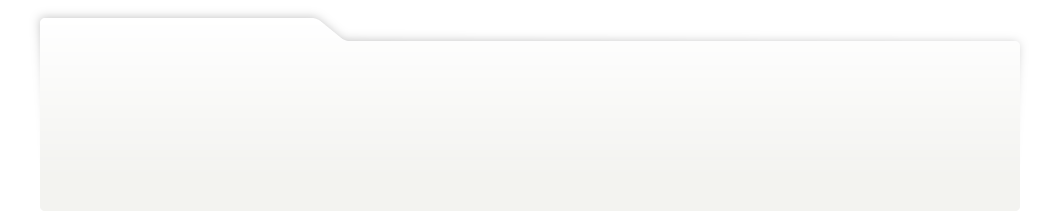
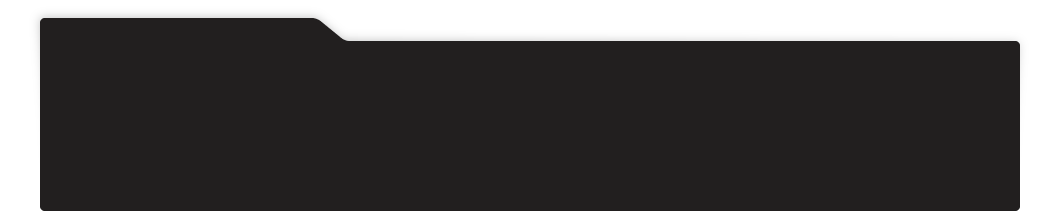
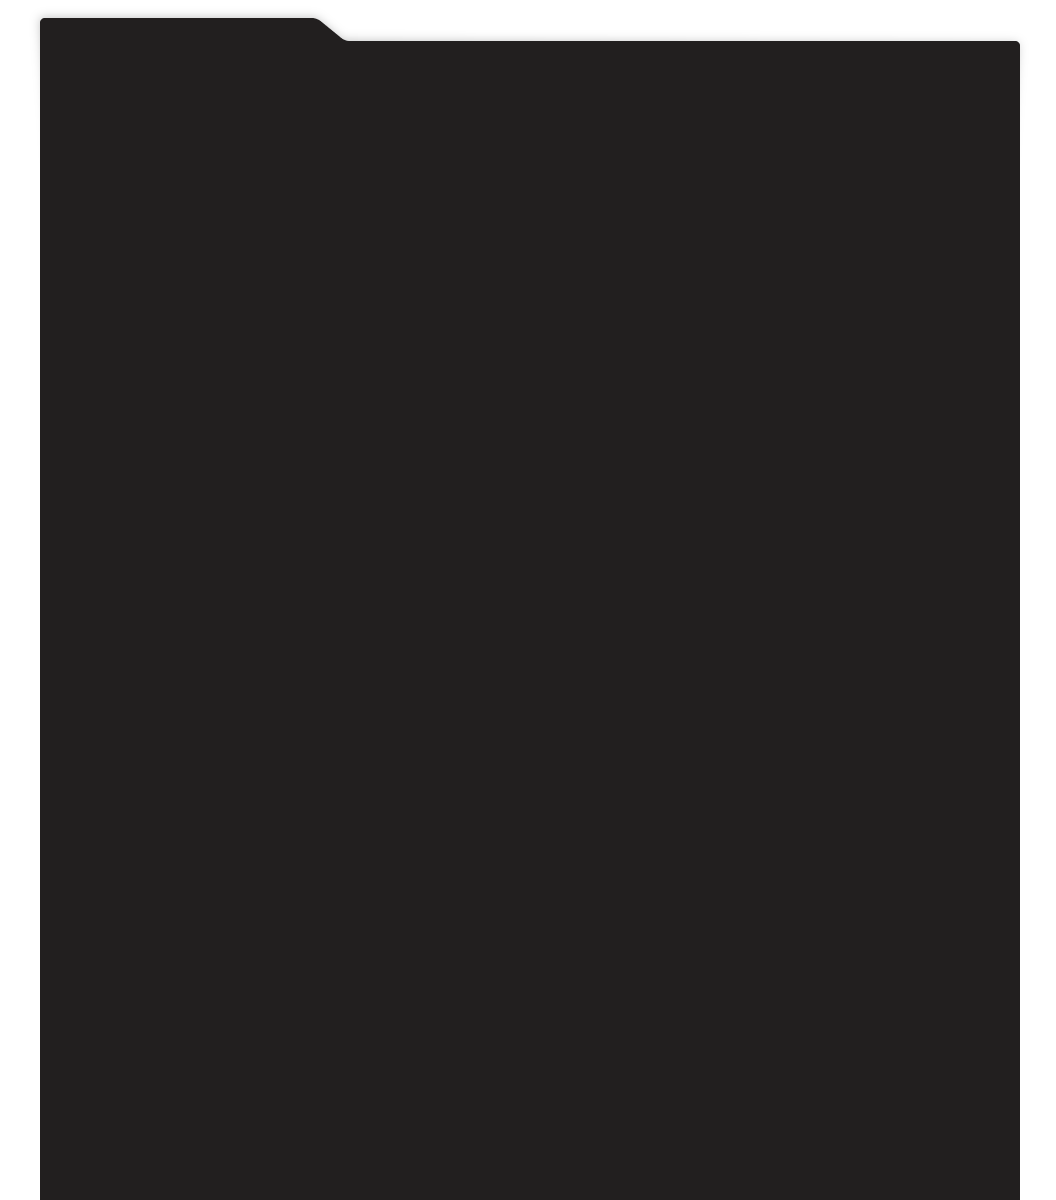
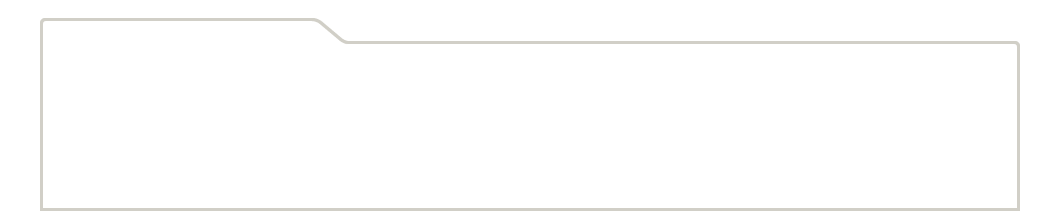
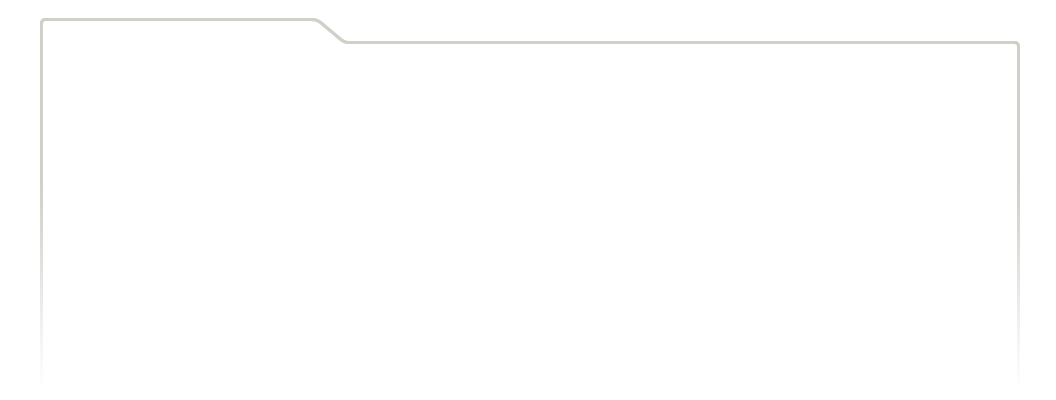
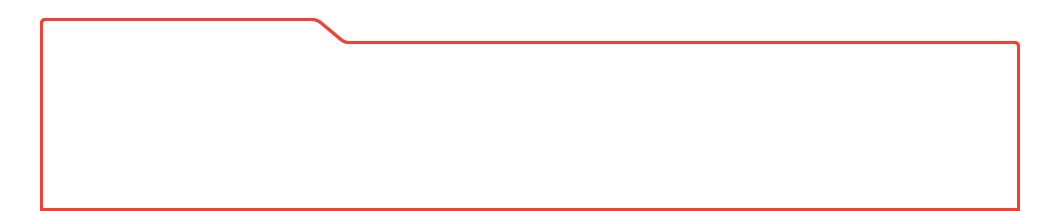
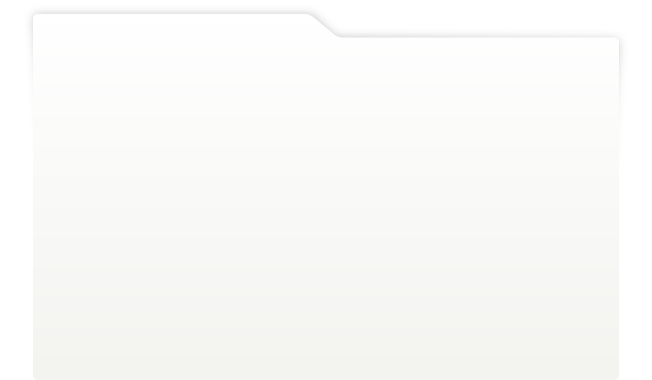
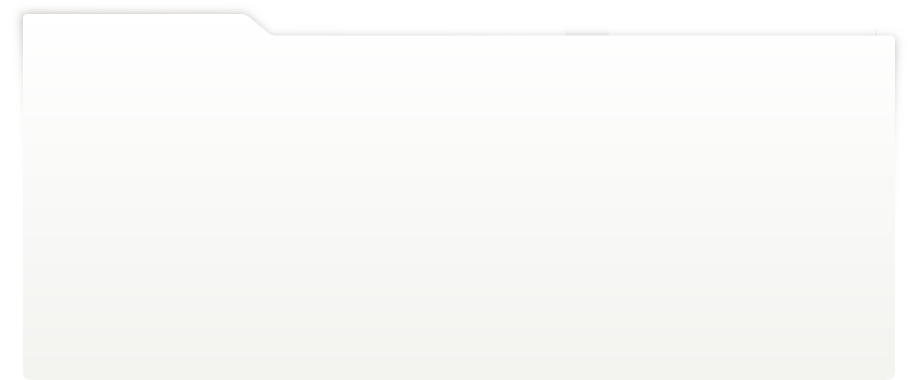
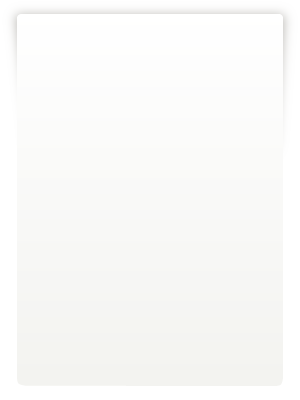
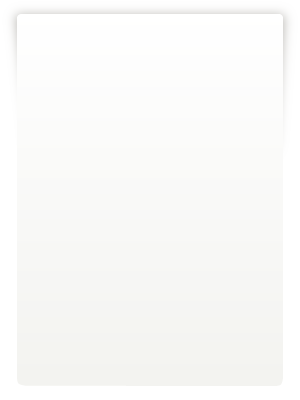
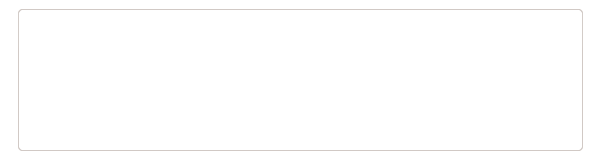
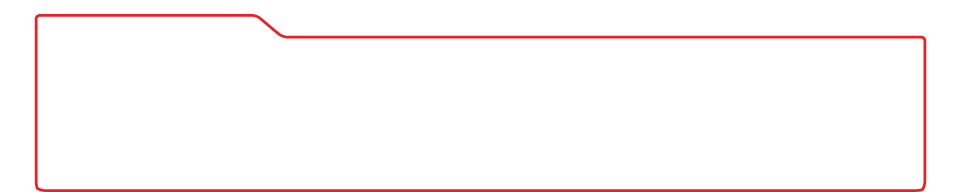
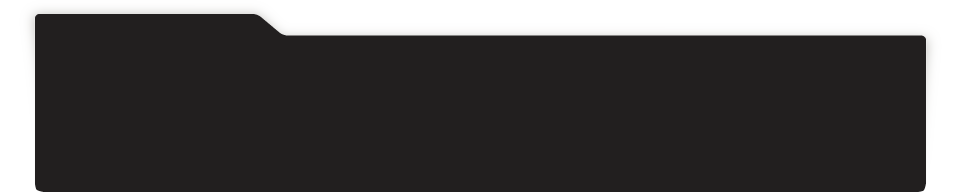
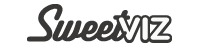
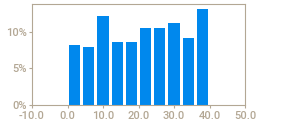
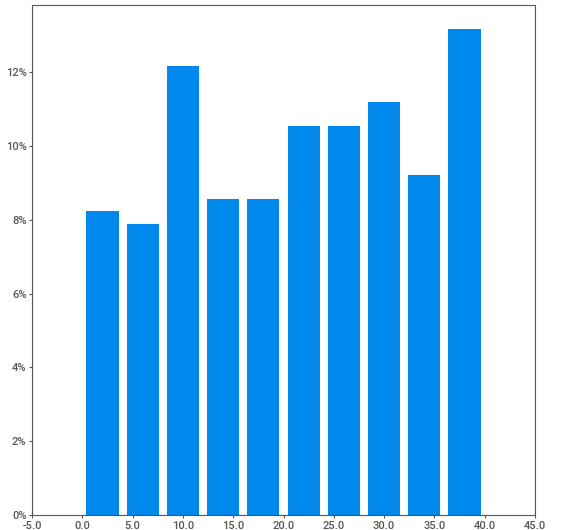
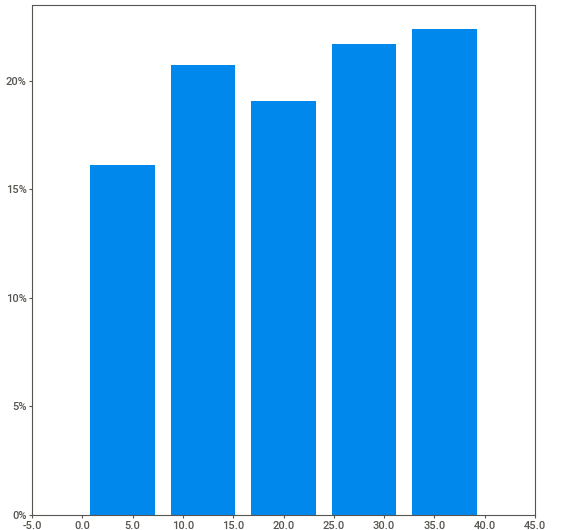
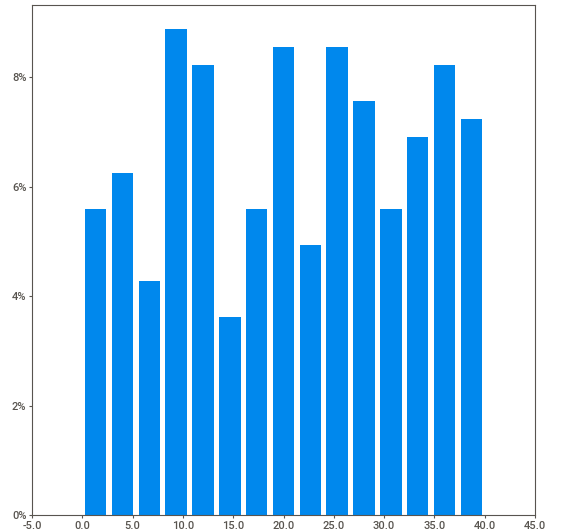
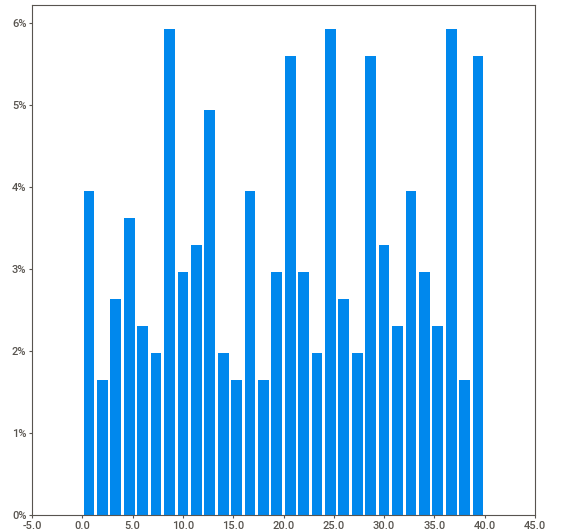
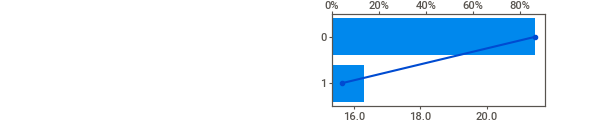
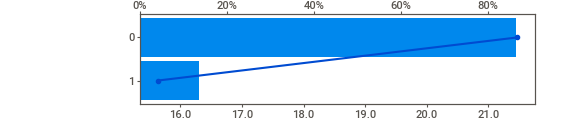
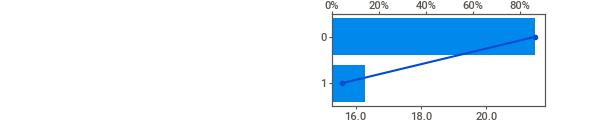
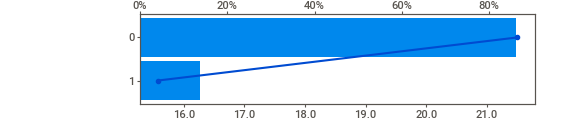
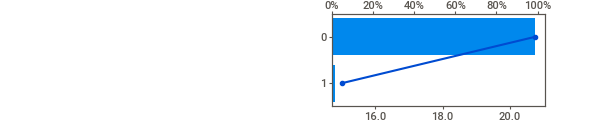
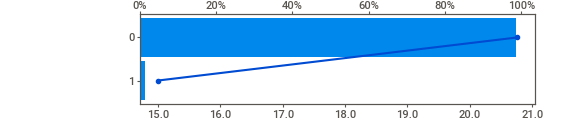
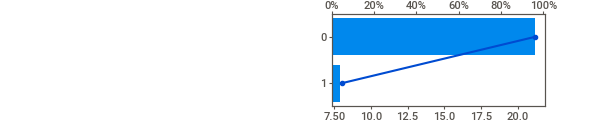
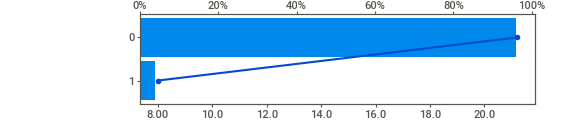
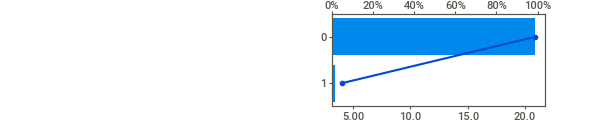
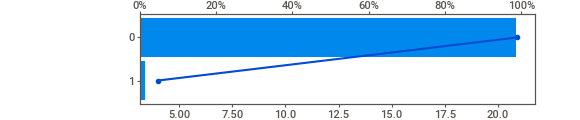
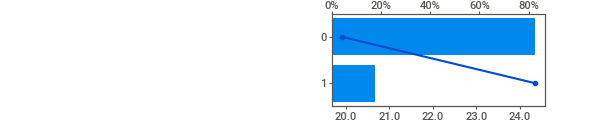
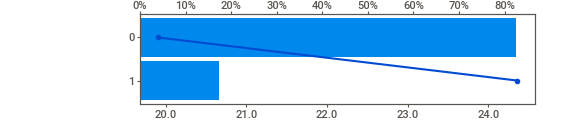
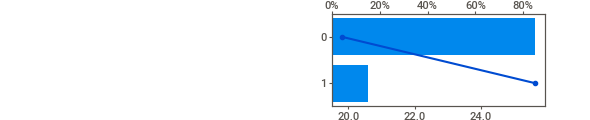
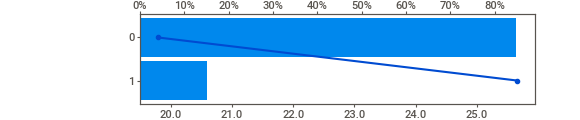
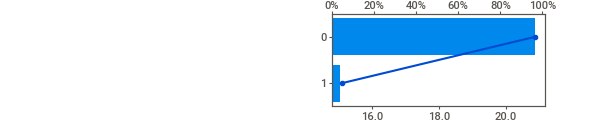
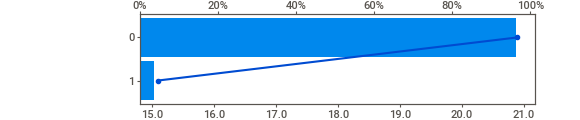
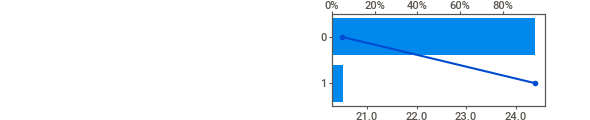
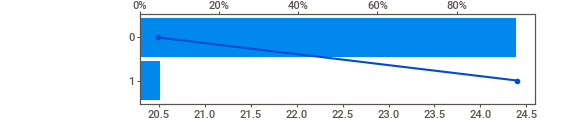
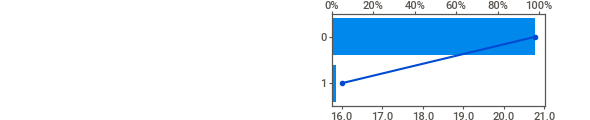
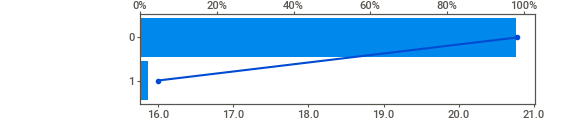
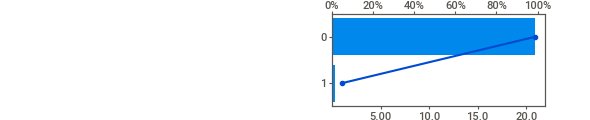
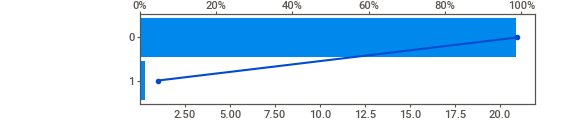
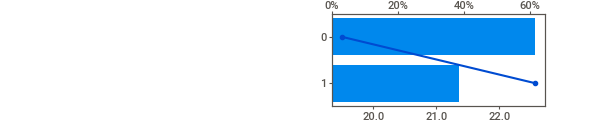
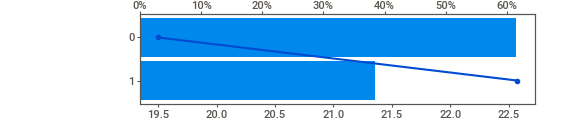
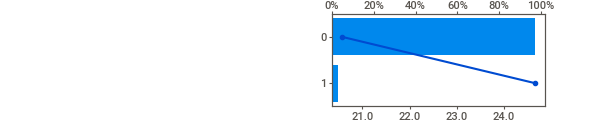
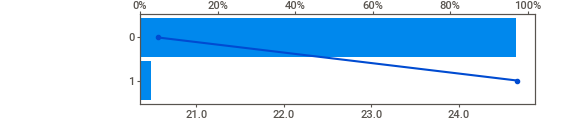
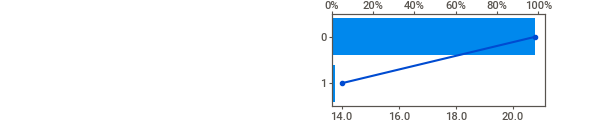
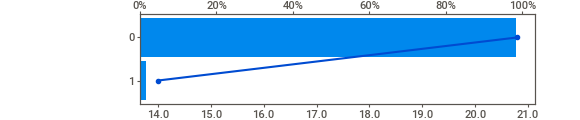
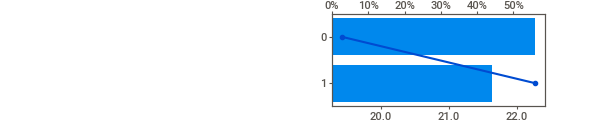
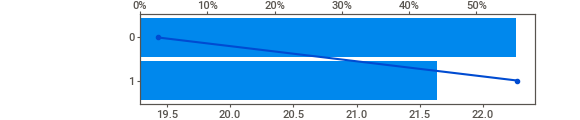
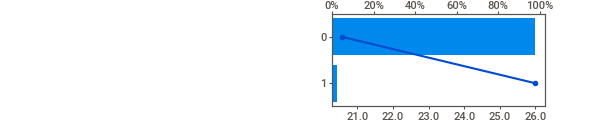
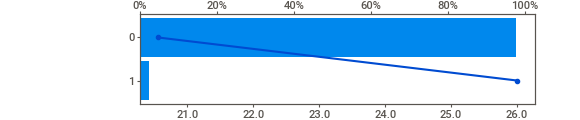
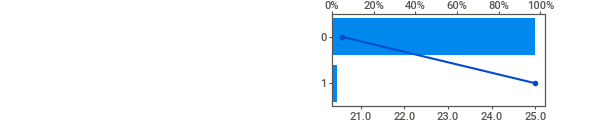
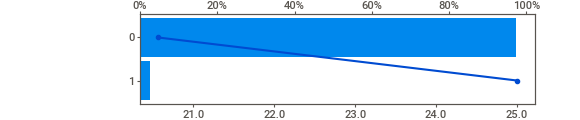
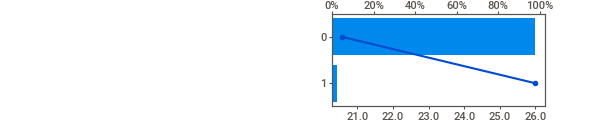
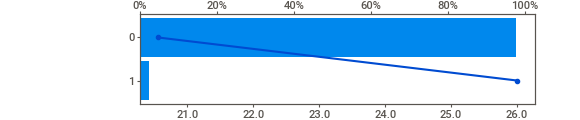
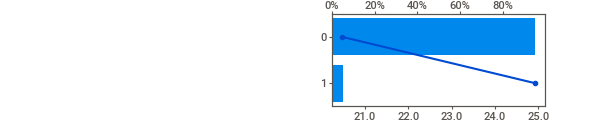
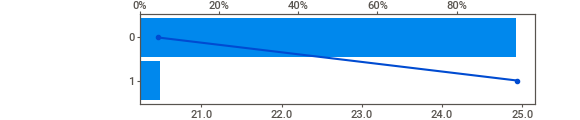
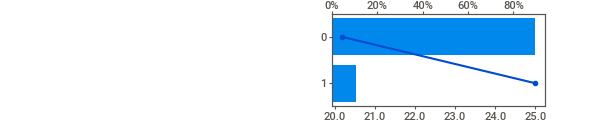
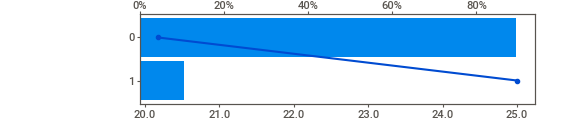
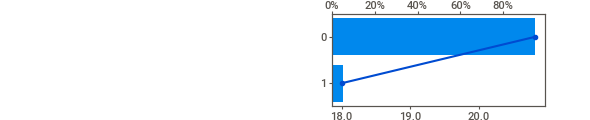
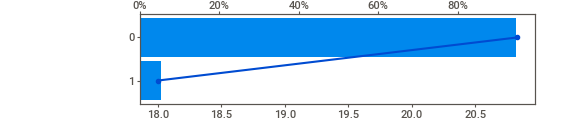
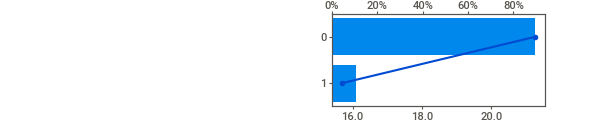
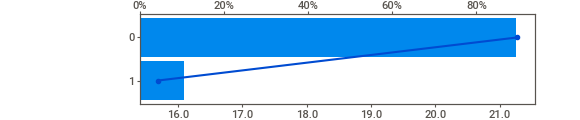
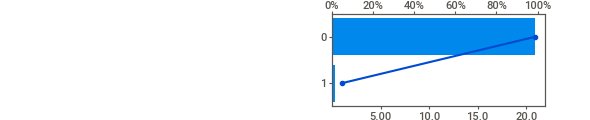
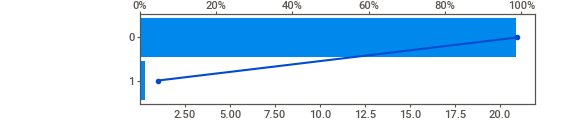
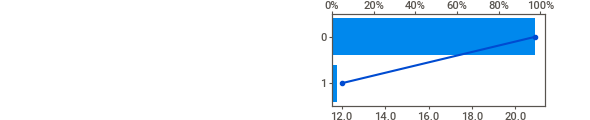
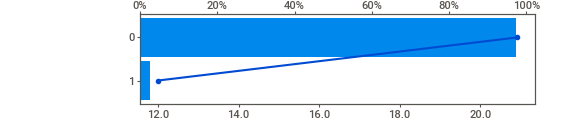
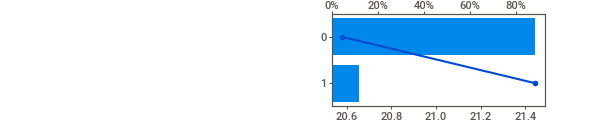
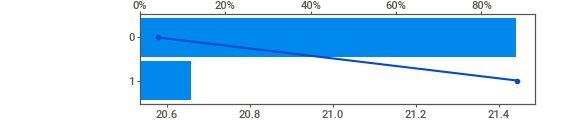
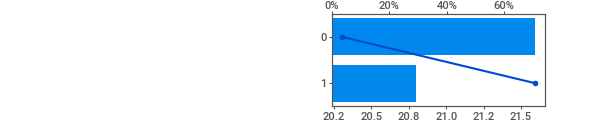
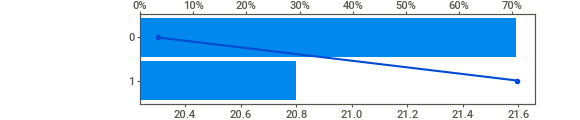
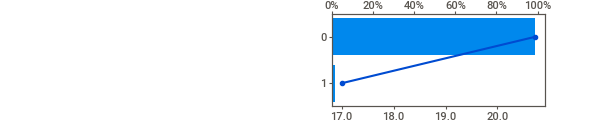
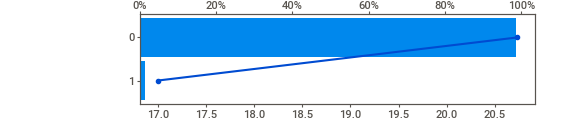
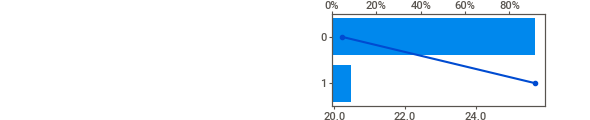
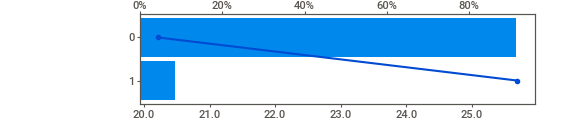
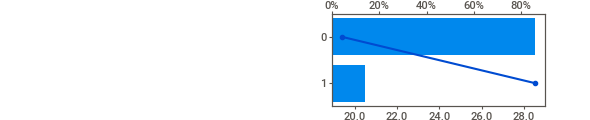
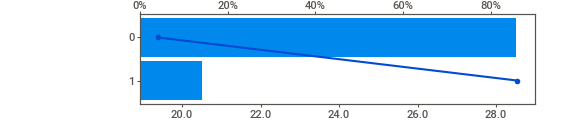
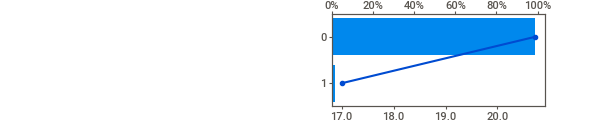
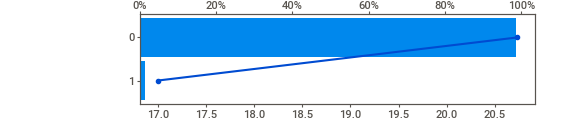
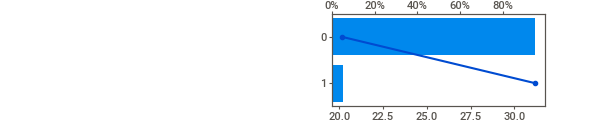
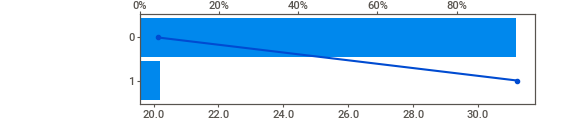
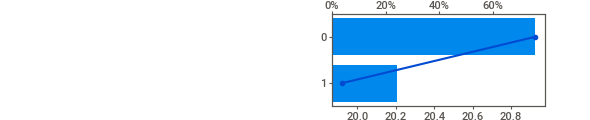
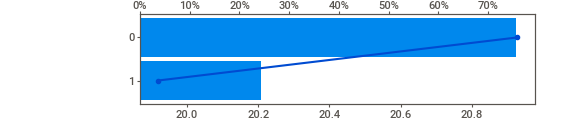
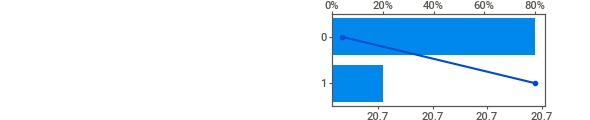
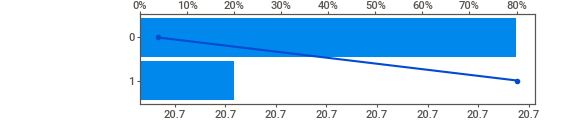
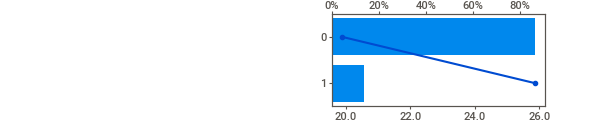
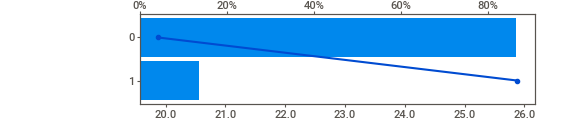
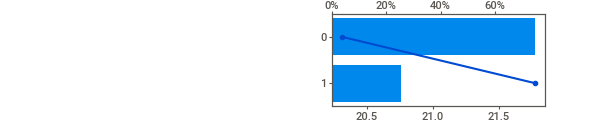
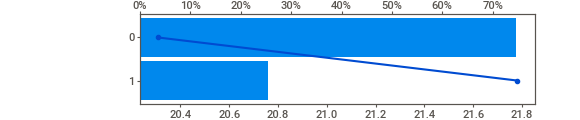
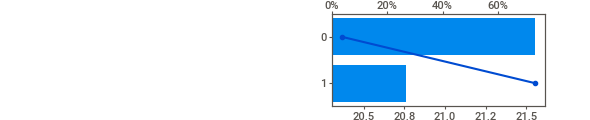
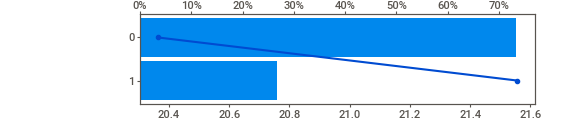
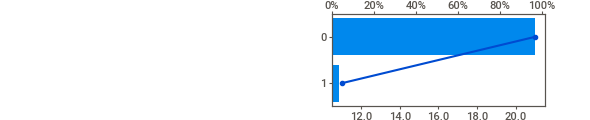
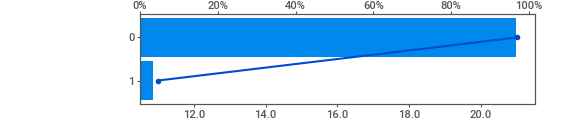
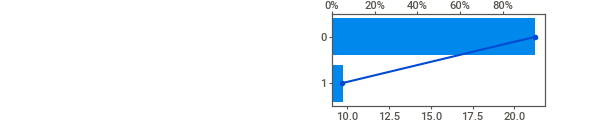
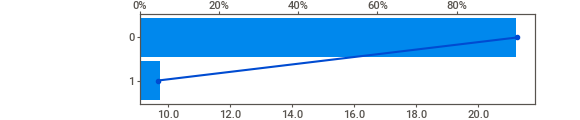
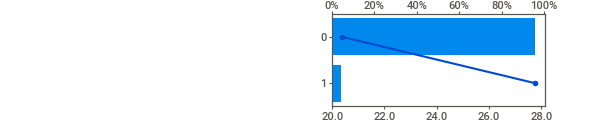
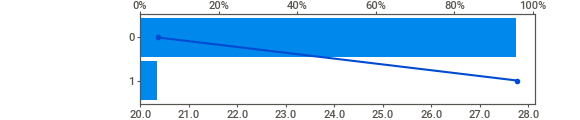
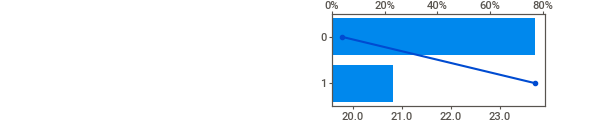
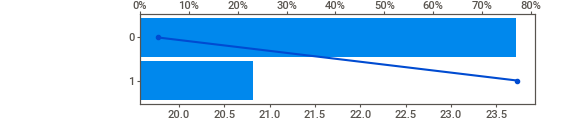
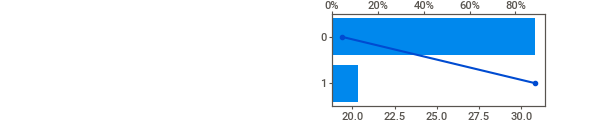
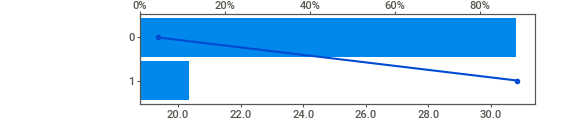
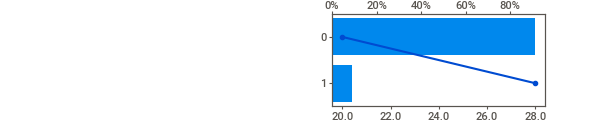
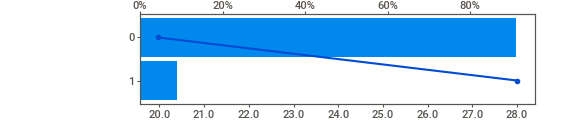
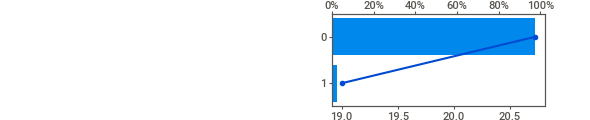
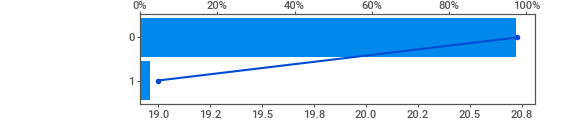
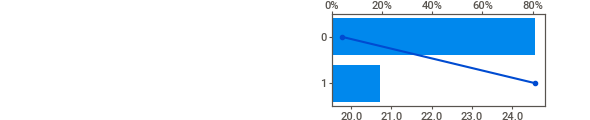
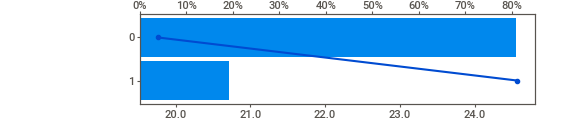
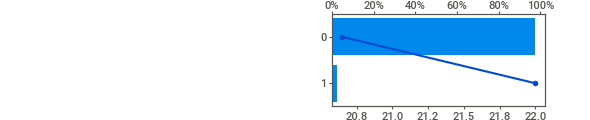
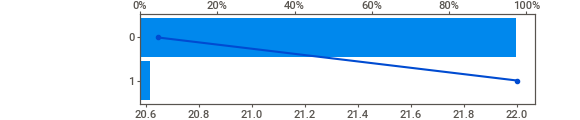
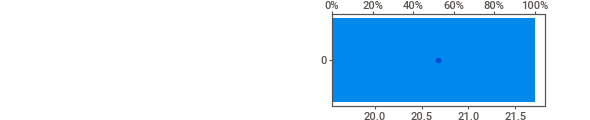
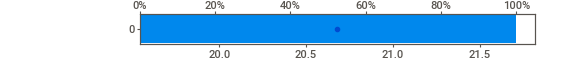
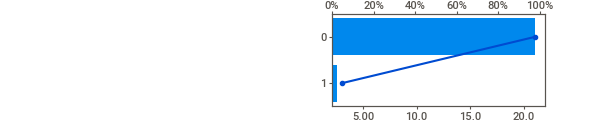
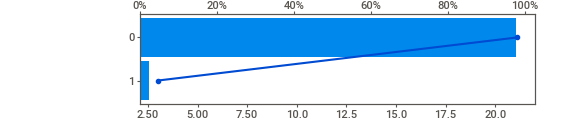
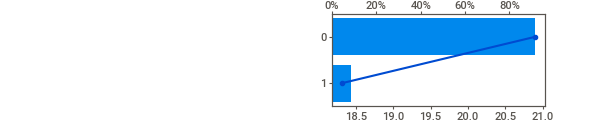
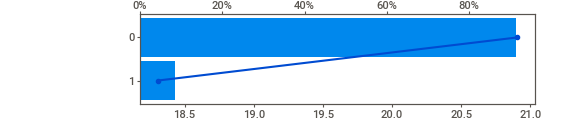
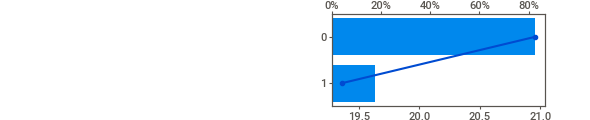
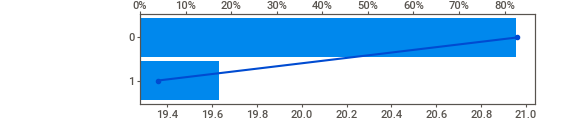
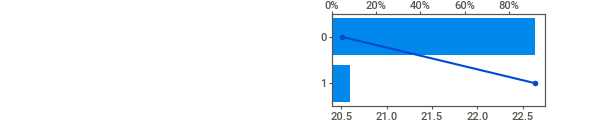
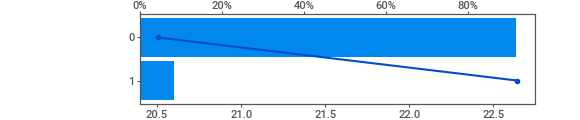
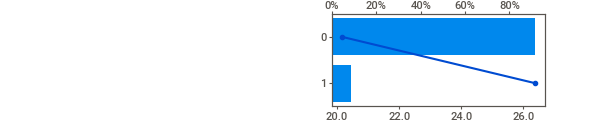
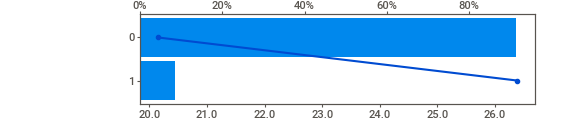
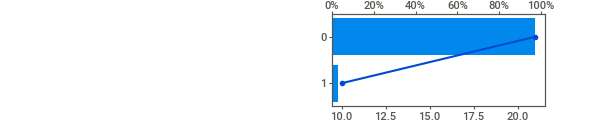
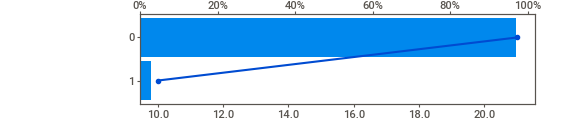
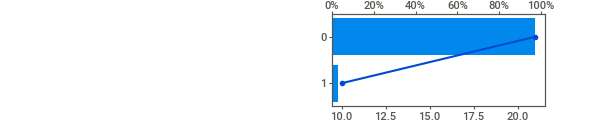
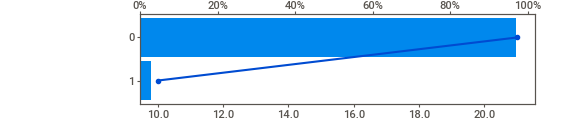
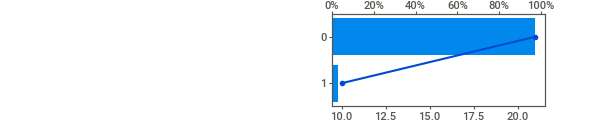
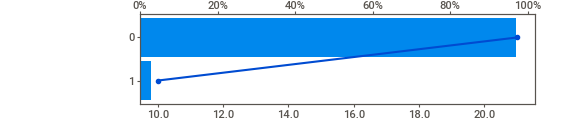
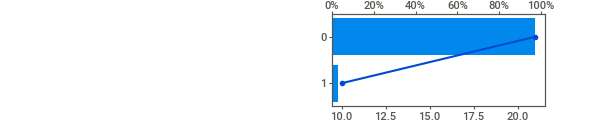
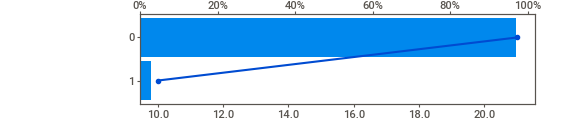
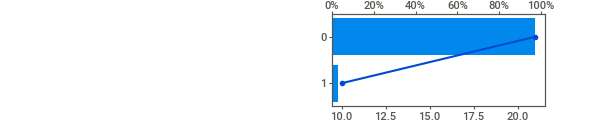
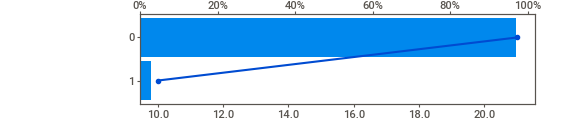
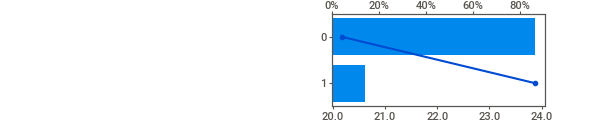
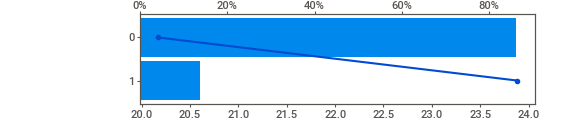
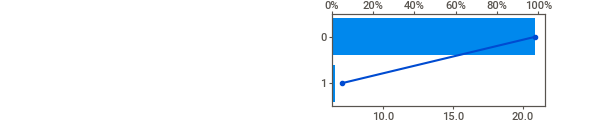
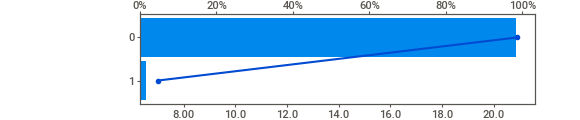
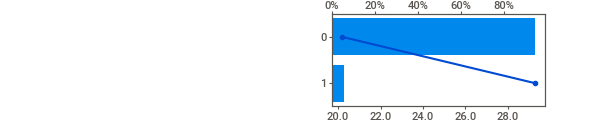
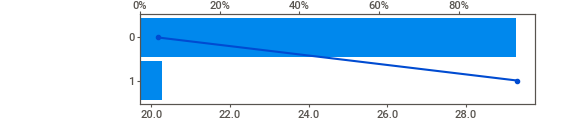
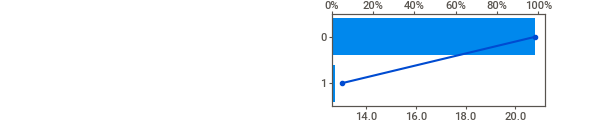
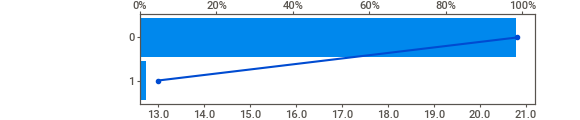
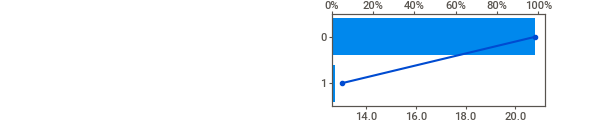
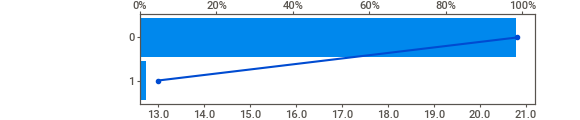
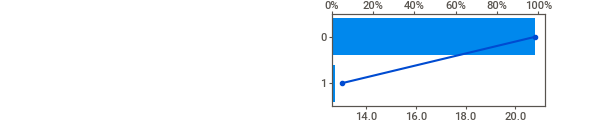
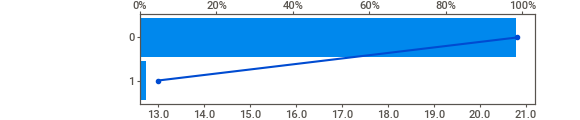
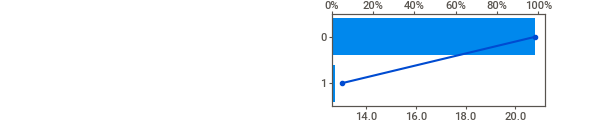
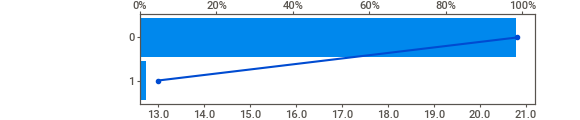
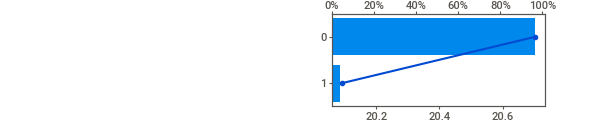
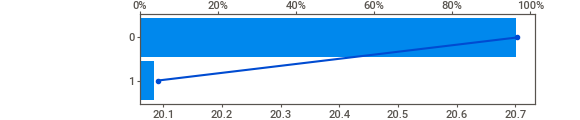
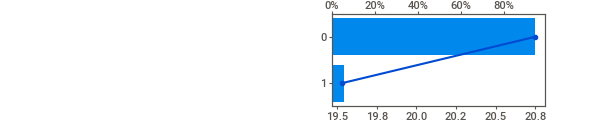
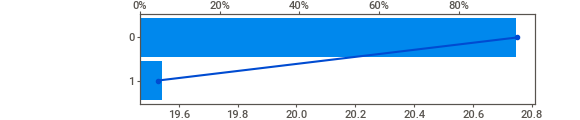
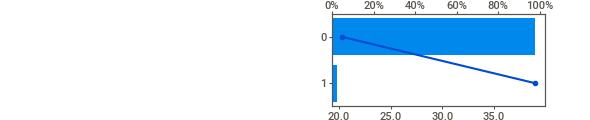
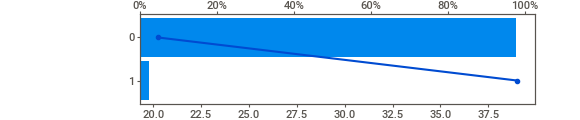
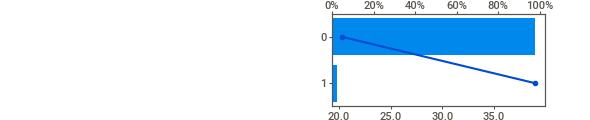
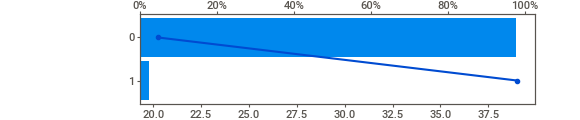
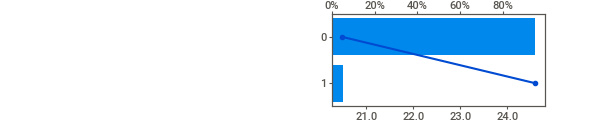
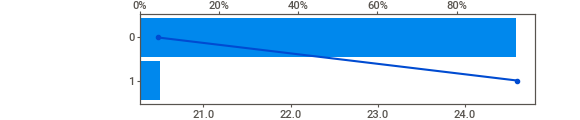
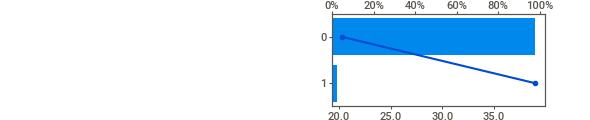
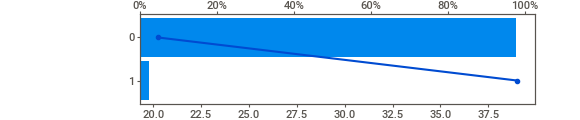
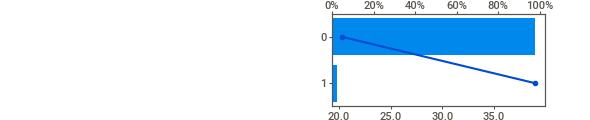
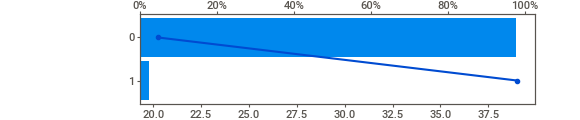
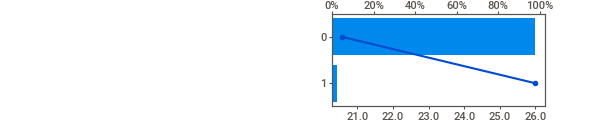
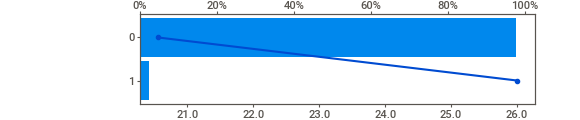
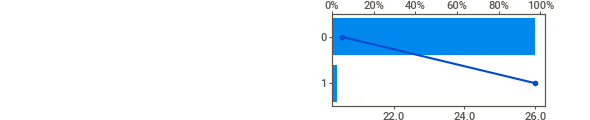
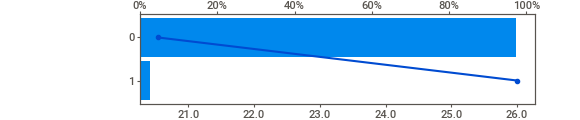
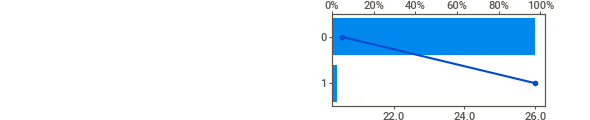
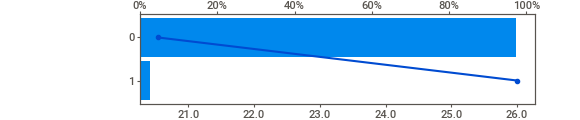
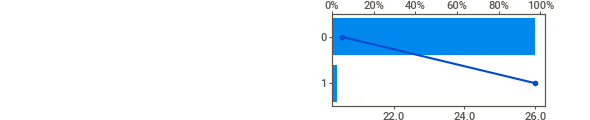
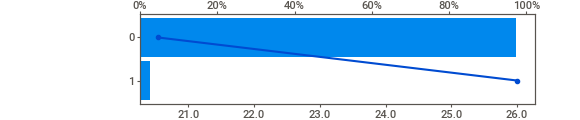
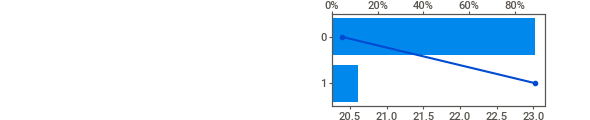
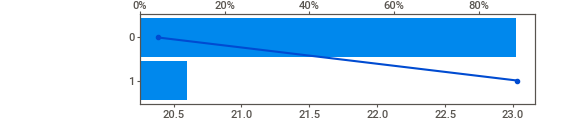
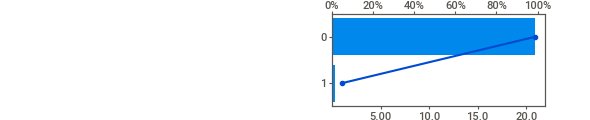
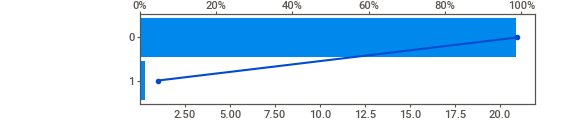
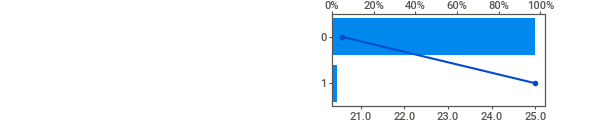
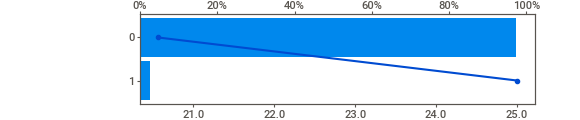
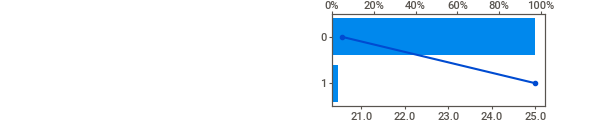
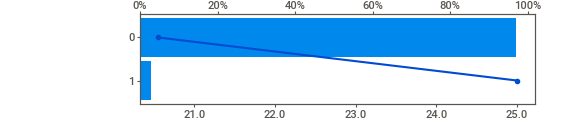
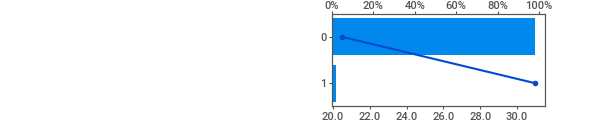
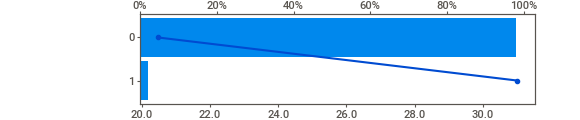
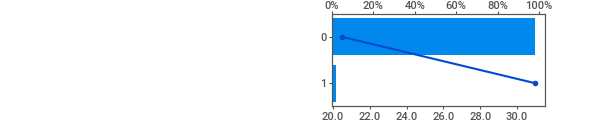
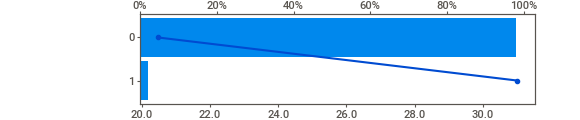
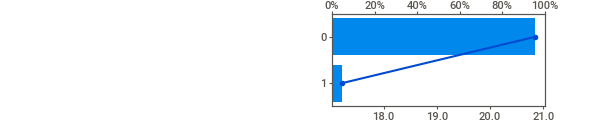
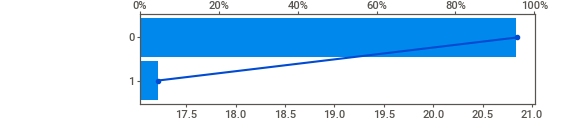
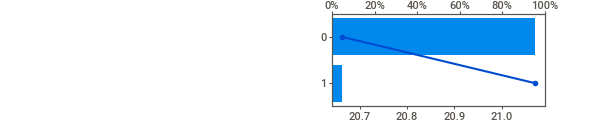
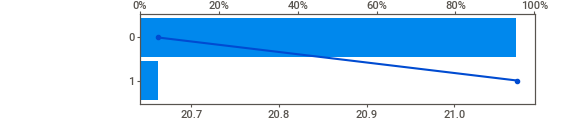
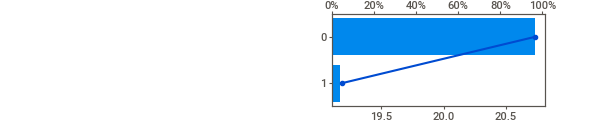
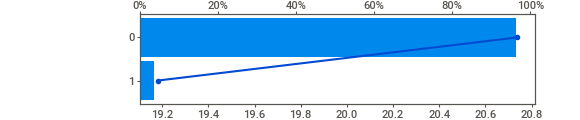
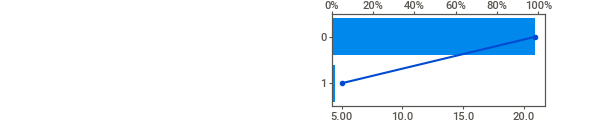
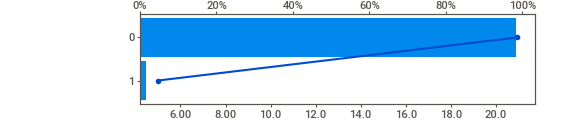
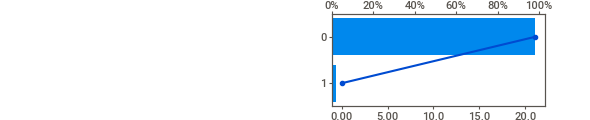
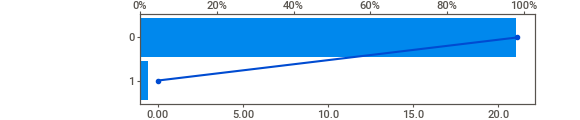
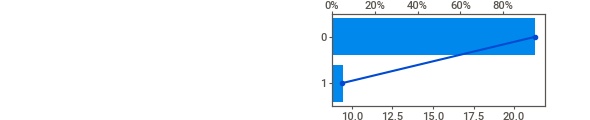
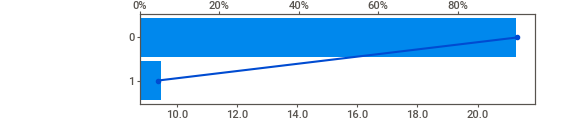
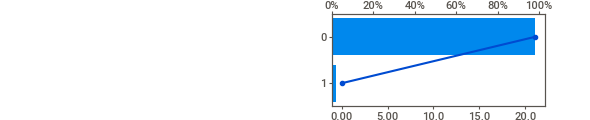
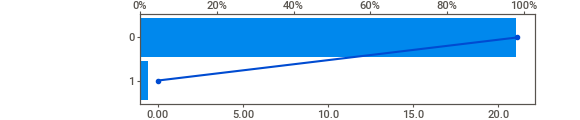
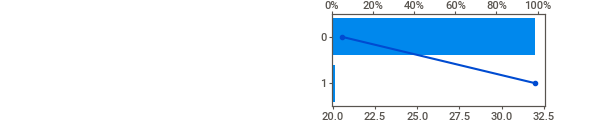
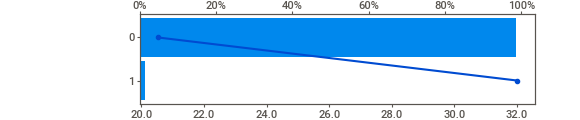
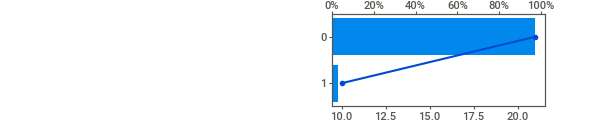
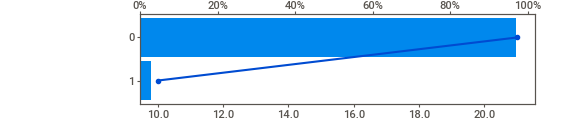
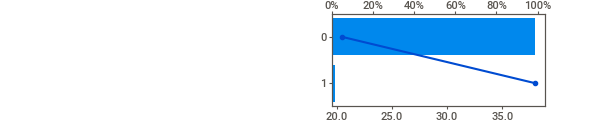
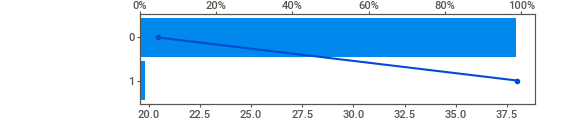
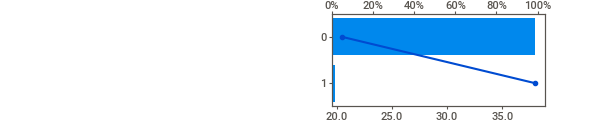
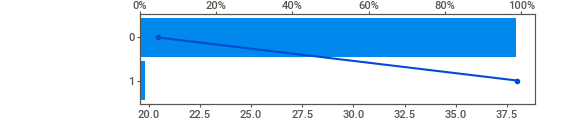
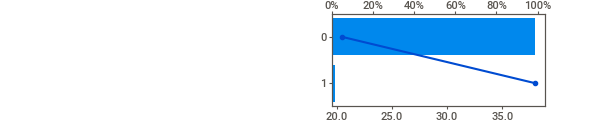
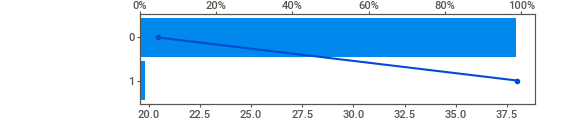
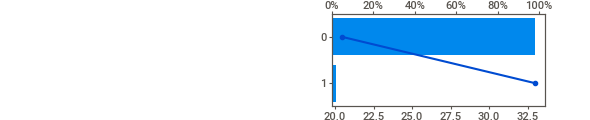
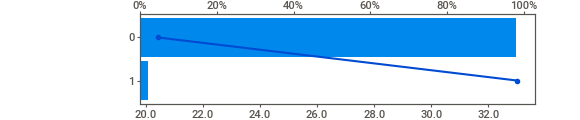
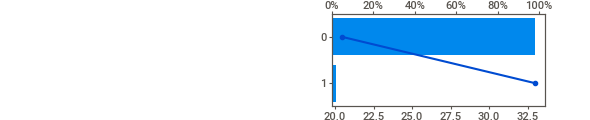
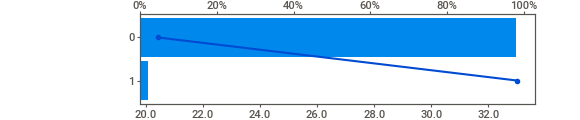
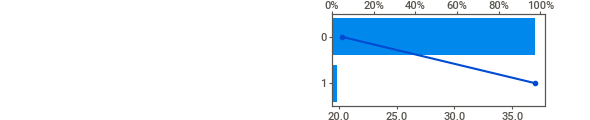
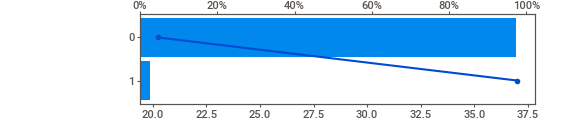
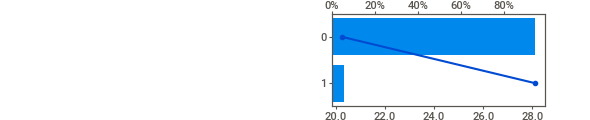
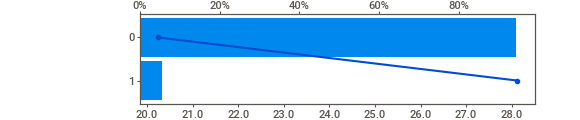
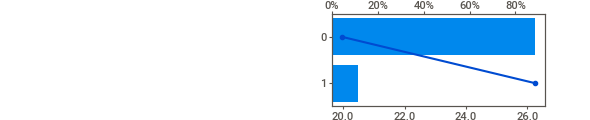
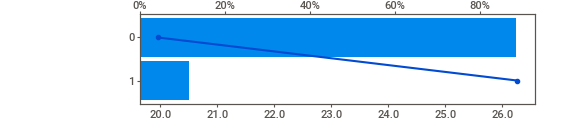
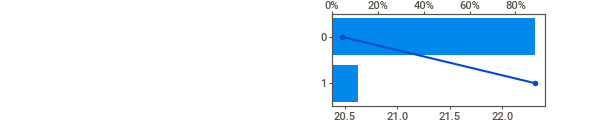
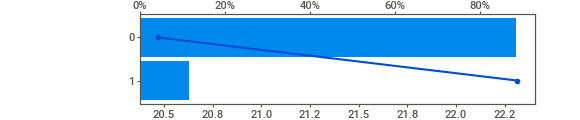
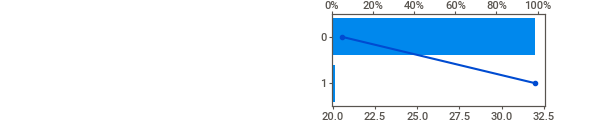
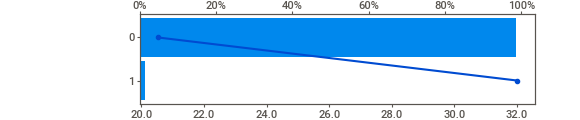
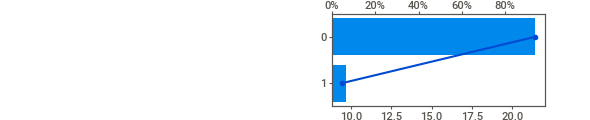
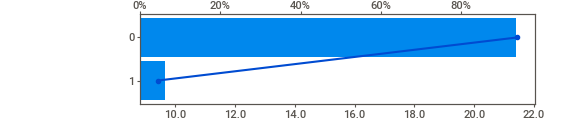
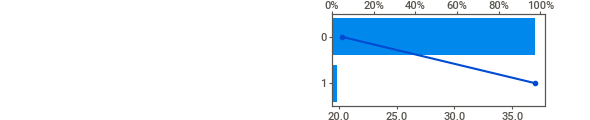
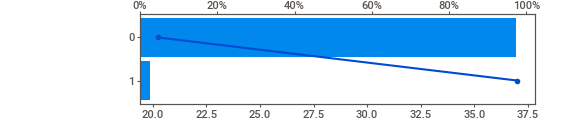
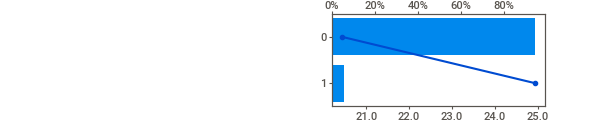
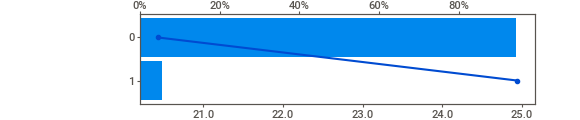
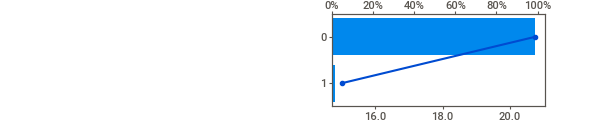
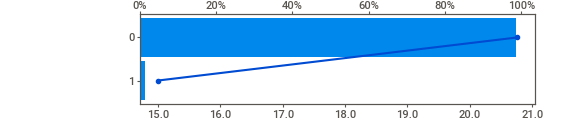
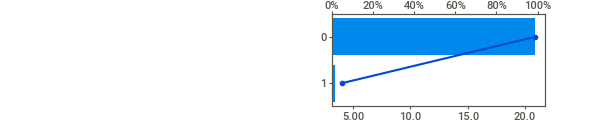
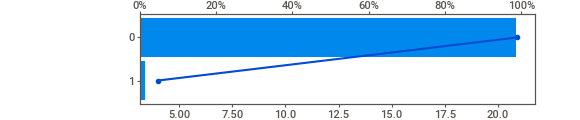
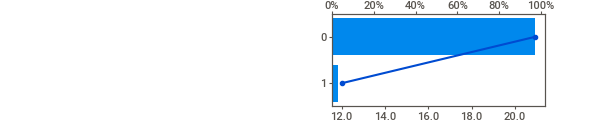
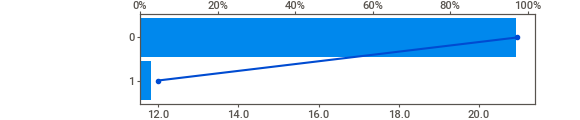
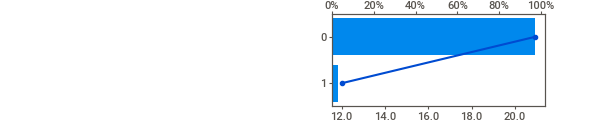
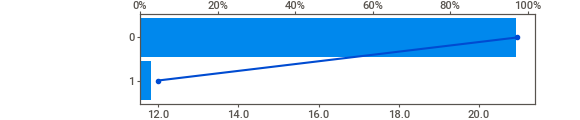
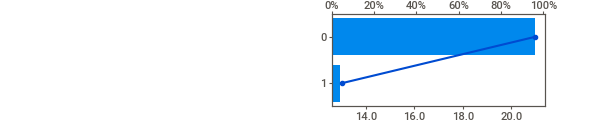
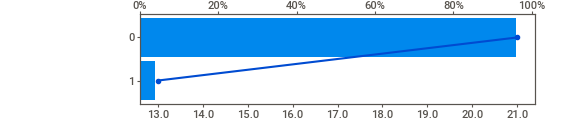
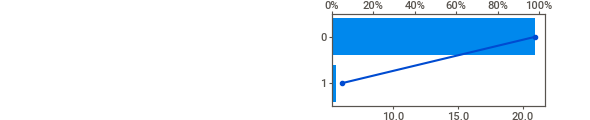
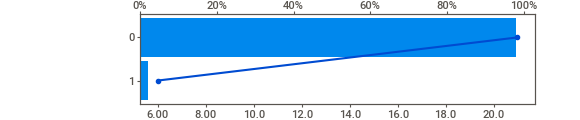
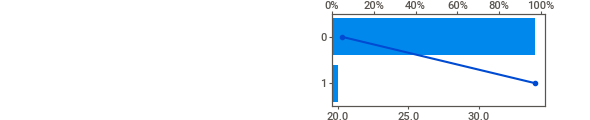
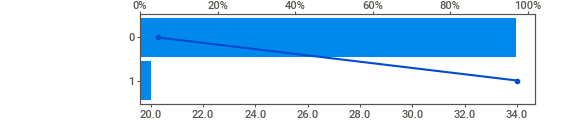
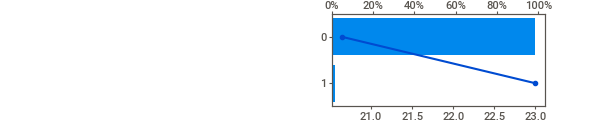
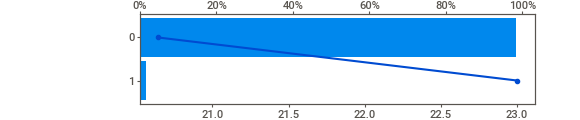
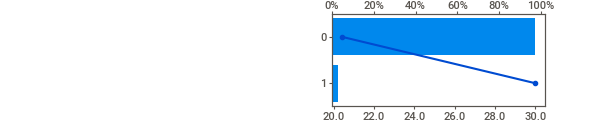
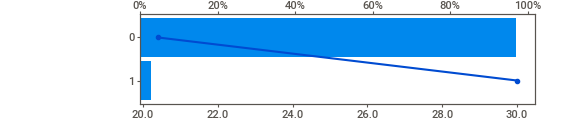
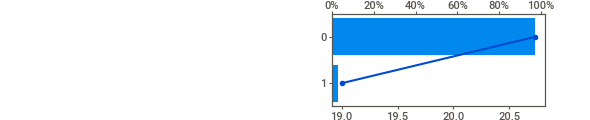
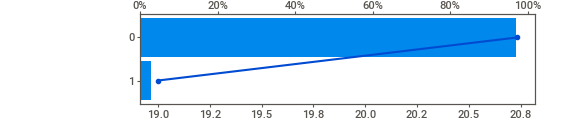
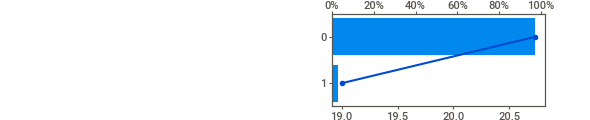
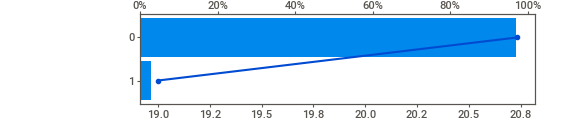
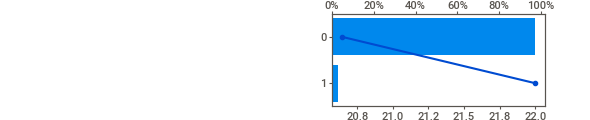
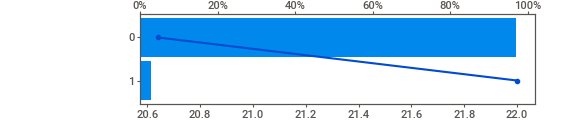
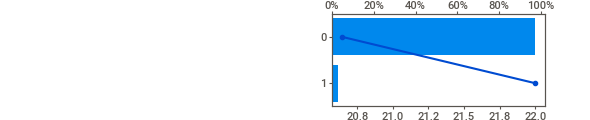
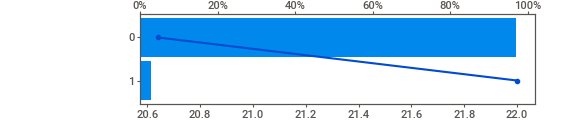
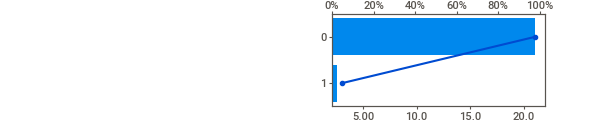
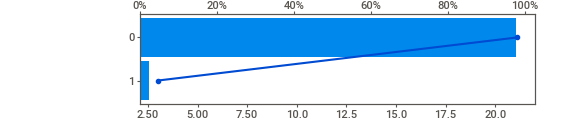
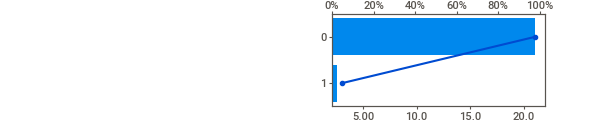
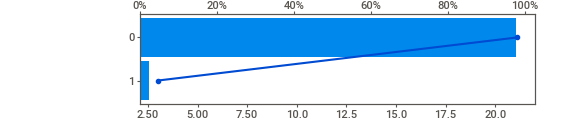
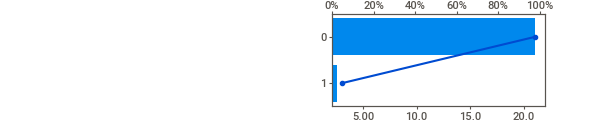
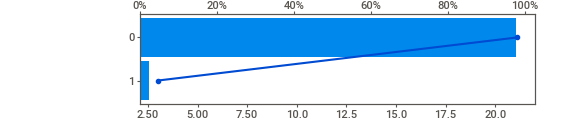
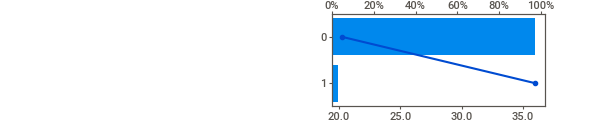
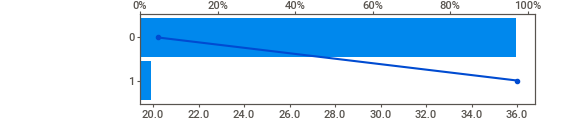
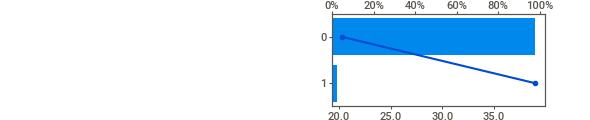
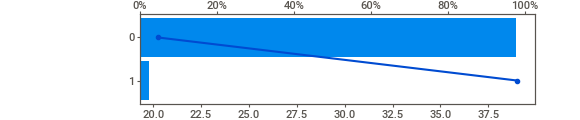
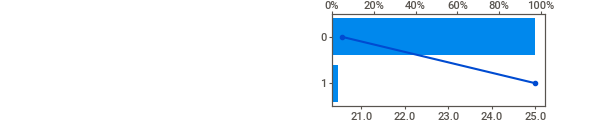
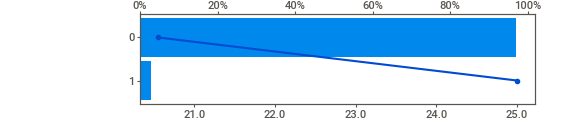
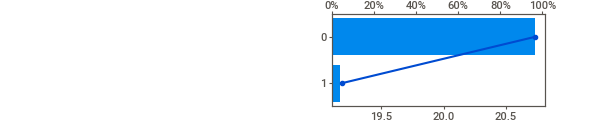
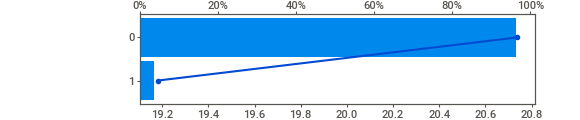
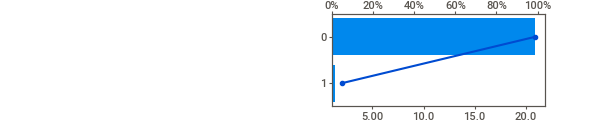
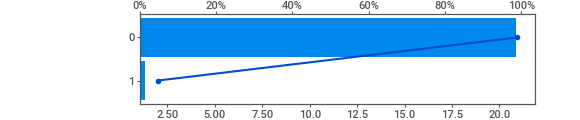
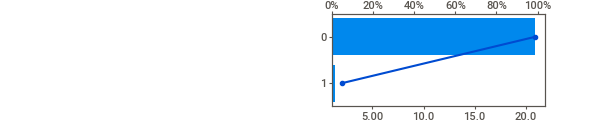
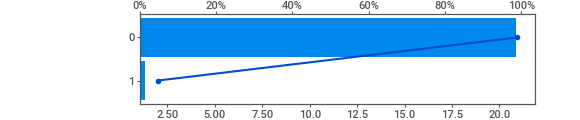
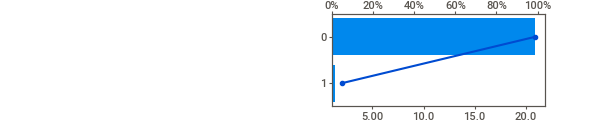
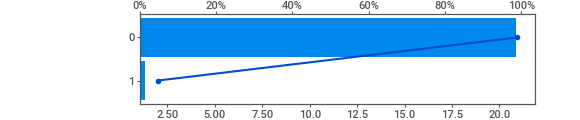
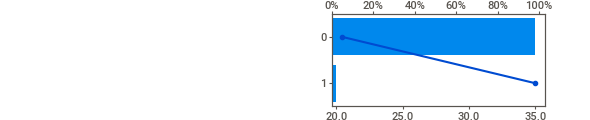
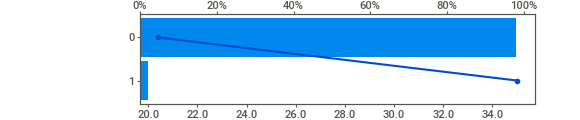
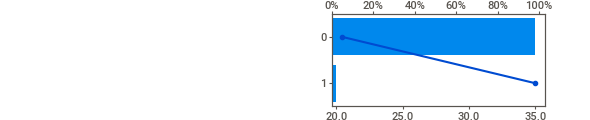
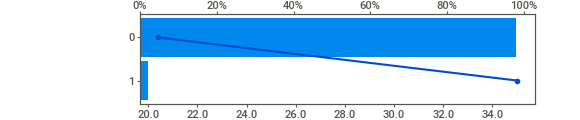
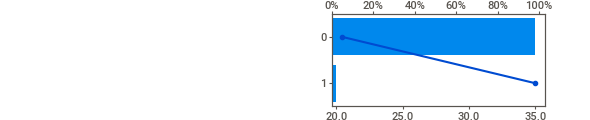
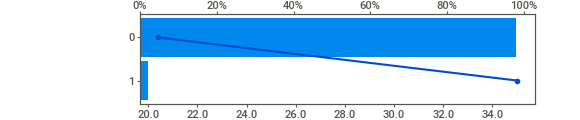
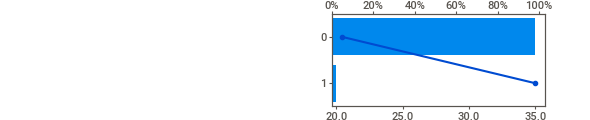
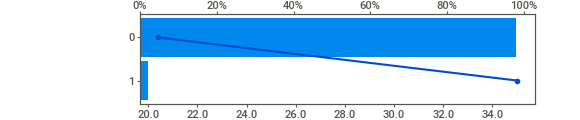
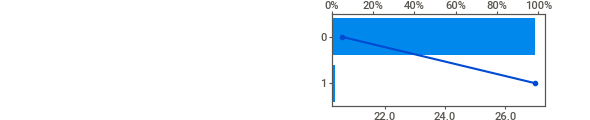
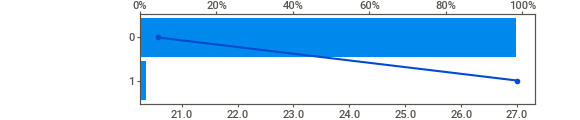
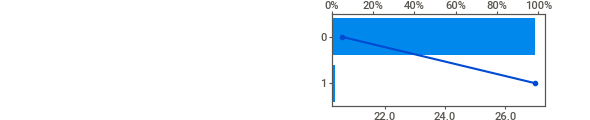
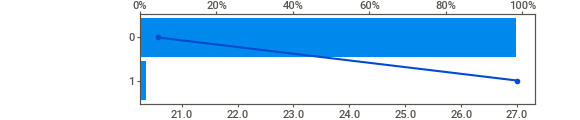
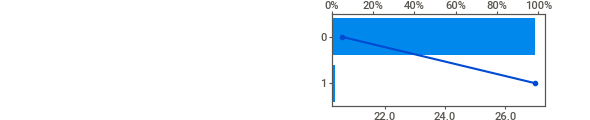
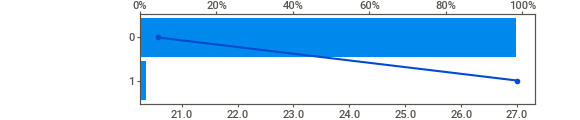
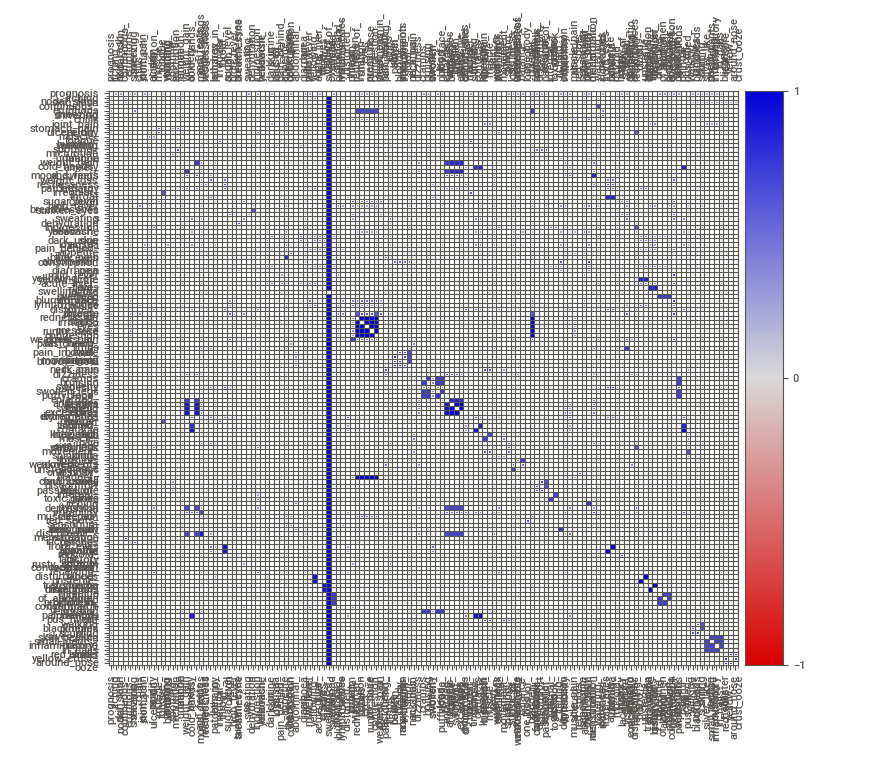
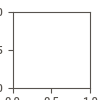

In [18]:
report = sweetviz.analyze([data_train, "PREDICT DESEASES"], target_feat="prognosis")
report.show_notebook()

In [19]:
data_train.shape,data_valid.shape

((304, 133), (42, 133))

In [20]:
features = data_train.drop(['prognosis'],axis=1)
target = data_train['prognosis']

features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.05,
                                                random_state=5, shuffle =True)  

In [21]:
features_train.shape,target_train.shape,features_test.shape,target_test.shape

((288, 132), (288,), (16, 132), (16,))

In [22]:
features_valid = data_valid.drop(['prognosis'],axis=1)
target_valid = data_valid['prognosis']

In [23]:
features_valid.shape,target_valid.shape

((42, 132), (42,))

In [35]:
booster = CatBoostClassifier(iterations=100,classes_count=len(target),eval_metric= 'Accuracy')

booster.fit(features_train, target_train,
            eval_set=(features_test, target_test),
            plot=True)
 
booster.set_feature_names(features_train.columns.tolist())

test_preds = booster.predict(features_test)
train_preds = booster.predict(features_train)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Found only 41 unique classes in the data, but have defined 304 classes. Probably something is wrong with data.


Learning rate set to 0.253814
0:	learn: 0.2500000	test: 0.2500000	best: 0.2500000 (0)	total: 71.1ms	remaining: 7.04s
1:	learn: 0.3680556	test: 0.3750000	best: 0.3750000 (1)	total: 126ms	remaining: 6.18s
2:	learn: 0.4444444	test: 0.4375000	best: 0.4375000 (2)	total: 195ms	remaining: 6.32s
3:	learn: 0.5520833	test: 0.6250000	best: 0.6250000 (3)	total: 246ms	remaining: 5.91s
4:	learn: 0.6805556	test: 0.6875000	best: 0.6875000 (4)	total: 296ms	remaining: 5.61s
5:	learn: 0.6770833	test: 0.6875000	best: 0.6875000 (4)	total: 345ms	remaining: 5.41s
6:	learn: 0.7013889	test: 0.6875000	best: 0.6875000 (4)	total: 395ms	remaining: 5.25s
7:	learn: 0.7326389	test: 0.6875000	best: 0.6875000 (4)	total: 454ms	remaining: 5.23s
8:	learn: 0.7534722	test: 0.6875000	best: 0.6875000 (4)	total: 517ms	remaining: 5.22s
9:	learn: 0.7951389	test: 0.6875000	best: 0.6875000 (4)	total: 594ms	remaining: 5.35s
10:	learn: 0.8125000	test: 0.6875000	best: 0.6875000 (4)	total: 673ms	remaining: 5.45s
11:	learn: 0.8263889	t

In [33]:
print('Список всех параметров модели\n :',booster.get_all_params())
print('\nСписок заданных параметров :',booster.get_params())

Список всех параметров модели
 : {'nan_mode': 'Min', 'eval_metric': 'MultiClass', 'iterations': 100, 'sampling_frequency': 'PerTree', 'leaf_estimation_method': 'Newton', 'grow_policy': 'SymmetricTree', 'penalties_coefficient': 1, 'boosting_type': 'Plain', 'model_shrink_mode': 'Constant', 'feature_border_type': 'GreedyLogSum', 'bayesian_matrix_reg': 0.10000000149011612, 'force_unit_auto_pair_weights': False, 'l2_leaf_reg': 3, 'random_strength': 1, 'rsm': 1, 'boost_from_average': False, 'model_size_reg': 0.5, 'pool_metainfo_options': {'tags': {}}, 'use_best_model': True, 'random_seed': 0, 'depth': 6, 'posterior_sampling': False, 'border_count': 254, 'bagging_temperature': 1, 'classes_count': 304, 'auto_class_weights': 'None', 'sparse_features_conflict_fraction': 0, 'leaf_estimation_backtracking': 'AnyImprovement', 'best_model_min_trees': 1, 'model_shrink_rate': 0, 'min_data_in_leaf': 1, 'loss_function': 'MultiClass', 'learning_rate': 0.2538140118122101, 'score_function': 'Cosine', 'task_

In [34]:
print("\nПравильность на тесте : %.2f"%booster.score(features_test, target_test))
print("\nПравильность на обучении : %.2f"%booster.score(features_train, target_train))


Правильность на тесте : 0.94

Правильность на обучении : 1.00


In [25]:
valid_preds = booster.predict(features_valid)

In [26]:
print("Правильность на valid : %.2f"%accuracy_score(valid_preds, target_valid))

Правильность на valid : 1.00


In [27]:
r = sklearn.metrics.multilabel_confusion_matrix(target_valid, valid_preds,
           labels=[45,25,15])
print(r)

[[[42  0]
  [ 0  0]]

 [[41  0]
  [ 0  1]]

 [[40  0]
  [ 0  2]]]


In [28]:
booster.get_feature_importance(prettified=True)[:15]

Feature Id  Importances
0            vomiting       11.744
1   yellowing_of_eyes        8.033
2             fatigue        6.174
3          high_fever        5.887
4            headache        4.890
5    loss_of_appetite        4.696
6      abdominal_pain        3.111
7          joint_pain        2.495
8         weight_loss        2.305
9              chills        2.260
10         chest_pain        2.184
11           sweating        2.082
12            itching        2.059
13        muscle_pain        2.025
14             nausea        2.004

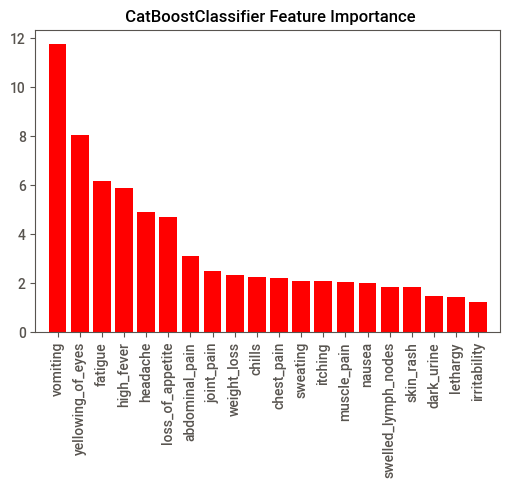

In [29]:
skplt.estimators.plot_feature_importances(booster, feature_names=features_valid.columns,
                                         title=" CatBoostClassifier Feature Importance",
                                         x_tick_rotation=90);                                         

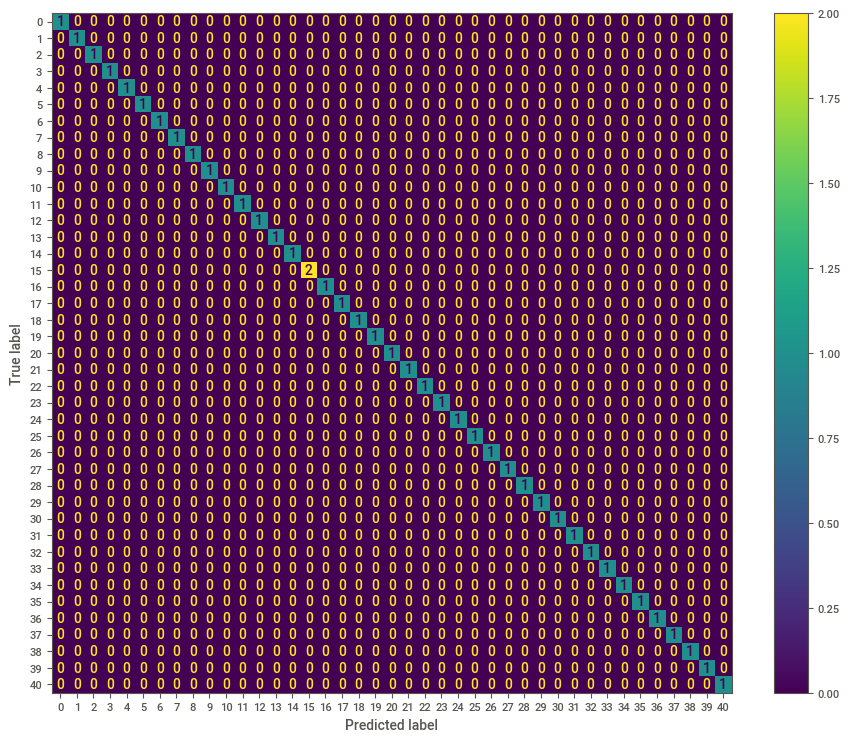

In [30]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
fig, ax = plt.subplots(figsize=(11, 9))

cm = confusion_matrix(target_valid, valid_preds)
cmp = ConfusionMatrixDisplay(cm, display_labels=booster.classes_[:41])
cmp.plot(ax=ax)

In [31]:
print(classification_report(target_valid, valid_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         1
           8       1.00      1.00      1.00         1
           9       1.00      1.00      1.00         1
          10       1.00      1.00      1.00         1
          11       1.00      1.00      1.00         1
          12       1.00      1.00      1.00         1
          13       1.00      1.00      1.00         1
          14       1.00      1.00      1.00         1
          15       1.00      1.00      1.00         2
          16       1.00      1.00      1.00         1
          17       1.00    